## Library

In [143]:
import numpy as np
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

warnings.filterwarnings(action="ignore")

DATA_PATH = "/kaggle/input/coupon-purchase-prediction/"

## EDA
* coupon_detail_train/test.csv 쿠폰 구매 정보  
  ITEM_COUNT: 쿠폰 개수  
  I_DATE: 구매일자  
  SMALL_AREA_NAME: 지역 정보  
  PURCHASEID_hash: 구매 해시값(PK)  
  USER_ID_hash: 유저 해시값  
  COUPON_ID_hash: 쿠폰 해시값  
    
* coupon_list_train/test.csv 모든 쿠폰 정보  
  CAPSULE_TEXT: 장르  
  GENRE_NAME: 장르  
  PRICE_RATE: 원가 대비 할인율  
  CATALOG_PRICE: 원가  
  DISCOUNT_PRICE: 할인되는 금액  
  DISPFROM: 게시 시작날짜  
  DISPEND: 게시 종료날짜  
  DISPPERIOD: 게시기간  
  VALIDFROM: 사용가능 시작날짜  
  VALIDEND: 사용가능 종료날짜  
  VALIDPERIOD: 사용가능 기간  
  USABLE_DATE_MON: 월요일 사용가능 여부  
  USABLE_DATE_TUE: 화요일 사용가능 여부  
  USABLE_DATE_WED: 수요일 사용가능 여부  
  USABLE_DATE_THU: 목요일 사용가능 여부  
  USABLE_DATE_FRI: 금요일 사용가능 여부  
  USABLE_DATE_SAT: 토요일 사용가능 여부  
  USABLE_DATE_SUN: 일요일 사용가능 여부  
  USABLE_DATE_HOLIDAY: 공휴일 사용가능 여부  
  USABLE_DATE_BEFORE_HOLIDAY: 공휴일 외 사용가능 여부  
  large_area_name: 사용가능 지역  
  ken_name  
  small_area_name  
  COUPON_ID_hash: 쿠폰 해시값(PK)  
    
* user_list.csv 회원 정보  
  REG_DATE: 등록일자  
  SEX_ID: 성별  
  AGE: 나이  
  WITHDRAW_DATE: 탈퇴일자  
  PREF_NAME: 선호지역  
  USER_ID_hash: 유저 해시값(PK)  
    
* coupon_visit_train/test.csv 사용자의 웹사이트 방문, 구매 기록  
  PURCHASE_FLG: 구매여부  
  I_DATE: 방문일시  
  PAGE_SERIAL: 방문 페이지 번호  
  REFERRER_hash: 방문 참조값 해시값 (방문전 링크값인거 같은데 활용 어떻게 할지 잘 모르겠음)  
  VIEW_COUPON_ID_hash: 확인한 쿠폰값 해시값  
  USER_ID_hash: 유저 해시값  
  SESSION_ID_hash: 세션 해시값  
  PURCHASEID_hash: 구매 해시값  

### data overview

In [144]:
with zipfile.ZipFile(DATA_PATH + "coupon_detail_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_detail = pd.read_csv(file)

# 결과 확인
df_detail.info()

압축 안의 파일: ['coupon_detail_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.7+ MB


In [145]:
df_detail.head(1).T

,0
ITEM_COUNT,1
I_DATE,2012-03-28 15:06:06
SMALL_AREA_NAME,兵庫
PURCHASEID_hash,c820a8882374a4e472f0984a8825893f
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb
COUPON_ID_hash,34c48f84026e08355dc3bd19b427f09a


In [146]:
with zipfile.ZipFile(DATA_PATH + "coupon_list_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_list = pd.read_csv(file)

# 결과 확인
df_list.info()


압축 안의 파일: ['coupon_list_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CAPSULE_TEXT                19413 non-null  object 
 1   GENRE_NAME                  19413 non-null  object 
 2   PRICE_RATE                  19413 non-null  int64  
 3   CATALOG_PRICE               19413 non-null  int64  
 4   DISCOUNT_PRICE              19413 non-null  int64  
 5   DISPFROM                    19413 non-null  object 
 6   DISPEND                     19413 non-null  object 
 7   DISPPERIOD                  19413 non-null  int64  
 8   VALIDFROM                   13266 non-null  object 
 9   VALIDEND                    13266 non-null  object 
 10  VALIDPERIOD                 13266 non-null  float64
 11  USABLE_DATE_MON             12408 non-null  float64
 12  USABLE_DATE_TUE             12408 non-null  float64


In [147]:
df_list.head(1).T

,0
CAPSULE_TEXT,グルメ
GENRE_NAME,グルメ
PRICE_RATE,50
CATALOG_PRICE,3000
DISCOUNT_PRICE,1500
DISPFROM,2011-07-08 12:00:00
DISPEND,2011-07-09 12:00:00
DISPPERIOD,1
VALIDFROM,2011-07-10
VALIDEND,2011-12-08


In [148]:
with zipfile.ZipFile(DATA_PATH + "coupon_visit_train.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_visit = pd.read_csv(file)

# 결과 확인
df_visit.info()

압축 안의 파일: ['coupon_visit_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   PURCHASE_FLG         int64 
 1   I_DATE               object
 2   PAGE_SERIAL          int64 
 3   REFERRER_hash        object
 4   VIEW_COUPON_ID_hash  object
 5   USER_ID_hash         object
 6   SESSION_ID_hash      object
 7   PURCHASEID_hash      object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB


In [149]:
df_visit.head(1).T

,0
PURCHASE_FLG,0
I_DATE,2012-03-28 14:15:00
PAGE_SERIAL,7
REFERRER_hash,7d3892e54acb559ae36c459978489330
VIEW_COUPON_ID_hash,34c48f84026e08355dc3bd19b427f09a
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb
SESSION_ID_hash,673af822615593249e7c6a9a1a6bbb1a
PURCHASEID_hash,NaN


In [150]:
with zipfile.ZipFile(DATA_PATH + "user_list.csv.zip", 'r') as zip_ref:
    # 압축 안의 파일 목록 확인
    file_list = zip_ref.namelist()
    print("압축 안의 파일:", file_list)
    # 첫 번째 CSV 파일을 DataFrame으로 읽기
    with zip_ref.open(file_list[0]) as file:
        df_user = pd.read_csv(file)

# 결과 확인
df_user.info()

압축 안의 파일: ['user_list.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REG_DATE       22873 non-null  object
 1   SEX_ID         22873 non-null  object
 2   AGE            22873 non-null  int64 
 3   WITHDRAW_DATE  922 non-null    object
 4   PREF_NAME      15617 non-null  object
 5   USER_ID_hash   22873 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [151]:
df_user.head(1).T

,0
REG_DATE,2012-03-28 14:14:18
SEX_ID,f
AGE,25
WITHDRAW_DATE,NaN
PREF_NAME,NaN
USER_ID_hash,d9dca3cb44bab12ba313eaa681f663eb


### 결측치 확인

In [152]:
print(f"<구매정보>\n{df_detail.isnull().sum()}\n")
print(f"<전체쿠폰정보>\n{df_list.isnull().sum()}\n")
print(f"<유저방문정보>\n{df_visit.isnull().sum()}\n")
print(f"<고객정보>\n{df_user.isnull().sum()}\n")

<구매정보>
ITEM_COUNT         0
I_DATE             0
SMALL_AREA_NAME    0
PURCHASEID_hash    0
USER_ID_hash       0
COUPON_ID_hash     0
dtype: int64

<전체쿠폰정보>
CAPSULE_TEXT                     0
GENRE_NAME                       0
PRICE_RATE                       0
CATALOG_PRICE                    0
DISCOUNT_PRICE                   0
DISPFROM                         0
DISPEND                          0
DISPPERIOD                       0
VALIDFROM                     6147
VALIDEND                      6147
VALIDPERIOD                   6147
USABLE_DATE_MON               7005
USABLE_DATE_TUE               7005
USABLE_DATE_WED               7005
USABLE_DATE_THU               7005
USABLE_DATE_FRI               7005
USABLE_DATE_SAT               7005
USABLE_DATE_SUN               7005
USABLE_DATE_HOLIDAY           7005
USABLE_DATE_BEFORE_HOLIDAY    7005
large_area_name                  0
ken_name                         0
small_area_name                  0
COUPON_ID_hash                   0
dtyp

In [153]:
print(df_detail.shape)
print(df_list.shape)
print(df_visit.shape)
print(df_user.shape)

(168996, 6)
(19413, 24)
(2833180, 8)
(22873, 6)


## Preprocessing

In [154]:
df_detail['I_DATE'] = pd.to_datetime(df_detail['I_DATE'])
df_detail['I_MONTH'] = df_detail['I_DATE'].dt.month
df_detail['I_DATE'] = df_detail['I_DATE'].dt.date

In [155]:
df_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ITEM_COUNT       168996 non-null  int64 
 1   I_DATE           168996 non-null  object
 2   SMALL_AREA_NAME  168996 non-null  object
 3   PURCHASEID_hash  168996 non-null  object
 4   USER_ID_hash     168996 non-null  object
 5   COUPON_ID_hash   168996 non-null  object
 6   I_MONTH          168996 non-null  int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 8.4+ MB


In [156]:
df_list['PURCHASE_PRICE'] = df_list['CATALOG_PRICE'] - df_list['DISCOUNT_PRICE']

In [157]:
df_list.head(3)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PURCHASE_PRICE
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,1500
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd,1080
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d,3500


### Merging: df_detail(구매기록) + df_list(쿠폰정보)

In [158]:
df_detail.head(3)

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,I_MONTH
0,1,2012-03-28,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,3
1,1,2011-07-04,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,7
2,1,2011-07-16,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,7


In [159]:
df_list.head(3)

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash,PURCHASE_PRICE
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af,1500
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd,1080
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d,3500


In [160]:
# PK확인
df_list.shape[0], len(df_list['COUPON_ID_hash'].unique())

(19413, 19413)

In [161]:
# PK확인
df_detail.shape[0], len(df_detail['PURCHASEID_hash'].unique())

(168996, 168996)

In [162]:
df = pd.merge(
    df_detail[['ITEM_COUNT','I_DATE','I_MONTH','SMALL_AREA_NAME','USER_ID_hash','COUPON_ID_hash', 'PURCHASEID_hash']],
    df_list[['GENRE_NAME','PRICE_RATE','PURCHASE_PRICE','COUPON_ID_hash']],
    on='COUPON_ID_hash',
    how='left'
)

In [163]:
df.head()

,ITEM_COUNT,I_DATE,I_MONTH,SMALL_AREA_NAME,USER_ID_hash,COUPON_ID_hash,PURCHASEID_hash,GENRE_NAME,PRICE_RATE,PURCHASE_PRICE
0,1,2012-03-28,3,兵庫,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,c820a8882374a4e472f0984a8825893f,宅配,78,5625
1,1,2011-07-04,7,銀座・新橋・東京・上野,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,1b4eb2435421ede98c8931c42e8220ec,宅配,50,1680
2,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,36b5f9ba46c44b65587d0b16f2e4c77f,グルメ,50,160
3,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2f30f46937cc9004774e576914b2aa1a,グルメ,50,160
4,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,4d000c64a55ac573d0ae1a8f03677f50,グルメ,50,160


In [164]:
df.shape

(168996, 10)

In [165]:
df_detail['ITEM_COUNT'].max()

55

In [166]:
# PK확인
df_user.shape[0], len(df_user['USER_ID_hash'].unique())

(22873, 22873)

In [167]:
df = pd.merge(
    df,
    df_user[['SEX_ID','AGE','USER_ID_hash']],
    on='USER_ID_hash',
    how='left'
)

In [168]:
df.head()

,ITEM_COUNT,I_DATE,I_MONTH,SMALL_AREA_NAME,USER_ID_hash,COUPON_ID_hash,PURCHASEID_hash,GENRE_NAME,PRICE_RATE,PURCHASE_PRICE,SEX_ID,AGE
0,1,2012-03-28,3,兵庫,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,c820a8882374a4e472f0984a8825893f,宅配,78,5625,f,25
1,1,2011-07-04,7,銀座・新橋・東京・上野,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7,1b4eb2435421ede98c8931c42e8220ec,宅配,50,1680,f,34
2,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,36b5f9ba46c44b65587d0b16f2e4c77f,グルメ,50,160,f,34
3,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,2f30f46937cc9004774e576914b2aa1a,グルメ,50,160,f,34
4,1,2011-07-16,7,恵比寿・目黒・品川,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2,4d000c64a55ac573d0ae1a8f03677f50,グルメ,50,160,f,34


In [169]:
df.shape

(168996, 12)

In [170]:
df.isnull().sum()

ITEM_COUNT         0
I_DATE             0
I_MONTH            0
SMALL_AREA_NAME    0
USER_ID_hash       0
COUPON_ID_hash     0
PURCHASEID_hash    0
GENRE_NAME         0
PRICE_RATE         0
PURCHASE_PRICE     0
SEX_ID             0
AGE                0
dtype: int64

## RFM
구간분할 방식  
1. Quantile (33%, 66%)	상·중·하 분위로 3등분	균형적인 그룹 분할  
2. Natural break (분포기반)	실제 데이터 변곡점 기반 (예: 1회, 2~4회, 5회 이상)	해석력 높음  
3. Business rule	비즈니스적으로 의미 있는 기준	해석 명확

In [171]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'거래날짜':'Recency', '거래':'Frequency', '지불금액':'Monetary'},inplace=True)

rfm_df.head(3)

,I_DATE,PURCHASEID_hash,PURCHASE_PRICE
USER_ID_hash,,,
0000b53e182165208887ba65c079fc21,275,1,4920
00035b86e6884589ec8d28fbf2fe7757,87,1,1620
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660


In [172]:
last = df['I_DATE'].max() + pd.DateOffset(days=1) # 마지막 거래일자 다음날을 기준일로 설정

rfm_df = df.groupby(['USER_ID_hash']).agg({
    'I_DATE': lambda x:(last-pd.to_datetime(x.max())).days,
    'PURCHASEID_hash': lambda x:x.nunique(),
    'PURCHASE_PRICE': sum
})
rfm_df.rename(columns={'I_DATE':'Recency', 'PURCHASEID_hash':'Frequency', 'PURCHASE_PRICE':'Monetary'},inplace=True)

rfm_df.head(3)

,Recency,Frequency,Monetary
USER_ID_hash,,,
0000b53e182165208887ba65c079fc21,275,1,4920
00035b86e6884589ec8d28fbf2fe7757,87,1,1620
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660


In [173]:
rfm_df.shape

(22782, 3)

### RFM visualization

## Scatter plot
* 데이터 많을때는 찍지 말것
* RFM 분석을 하기 전에 실제 데이터가 그 가정을 따르는지를 확인용 (분석 전 진단용 시각화)
* 고객 행동이 전형적인 RFM 패턴을 따름 (R낮을수록 F,M이 높음)
* 고객 행동이 예측 가능한 구조이므로 RFM segmentation의 설명력이 올라감

In [ ]:
# 건수 많을 때는 전체 데이터셋으로 scatterplot 그리는 것 지양

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

## RFM 분석결과

### Recency 분석결과
* 0\~25일: 대다수의 고객 집중
* 25\~100일: 완만한 감소
* 100일\~: 거의 변화없음

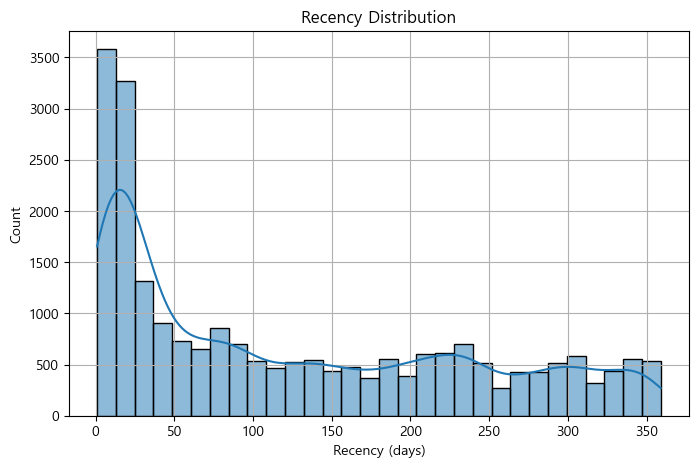

In [175]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Recency', bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Log-scaled Recency Distribution')

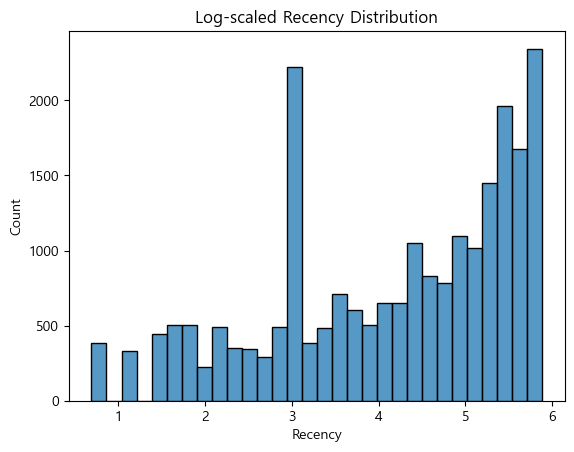

In [176]:
sns.histplot(np.log1p(rfm_df['Recency']), bins=30)
plt.title("Log-scaled Recency Distribution")

### Frequency 분석결과
* 0\~5일: 대다수의 고객 집중
* 5\~40일: 완만한 감소
* 40일\~: 거의 변화없음

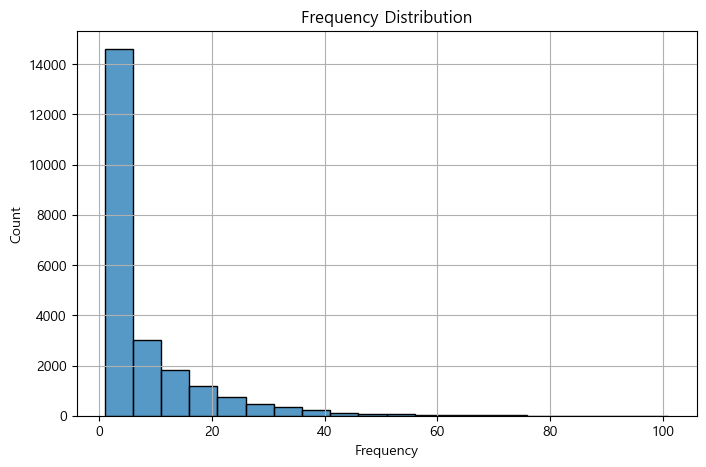

In [177]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Frequency', bins=20, kde=False)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

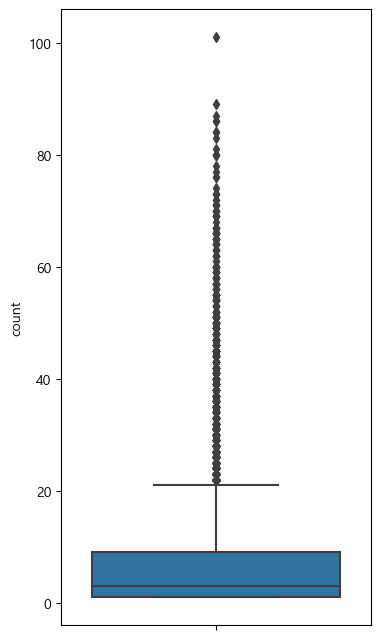

In [178]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

### Monetary 분석결과
* 0\~0.7 (0\~70,000): 대다수의 고객 집중
* 0.7\~3.3 (70,000\~330,000): 완만한 감소
* 3.3\~ (330,000\~): 거의 변화없음

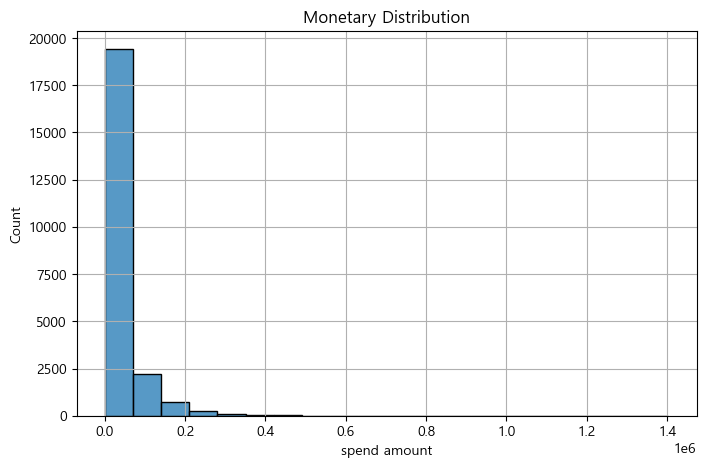

In [179]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm_df, x='Monetary', bins=20, kde=False)
plt.title('Monetary Distribution')
plt.xlabel('spend amount')
plt.ylabel('Count')
plt.grid(True)
plt.show()

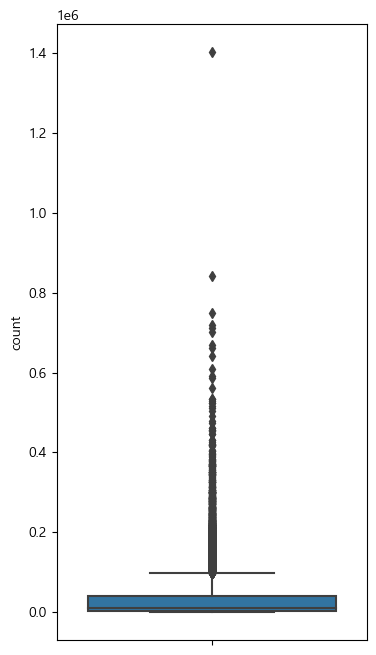

In [180]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Monetary')
plt.ylabel('count')
plt.show()

## RFM 점수계산

### recency grading

In [181]:
'''
def assign_R(recency):
    if recency <= 30:
        return 5
    elif recency <= 60:
        return 4
    elif recency <= 90:
        return 3
    elif recency <= 180:
        return 2
    elif recency <= 365:
        return 1
    else:
        return 0
'''
# 일반적인 비즈니스 분할방식 30,60,90,180,365

'\ndef assign_R(recency):\n    if recency <= 30:\n        return 5\n    elif recency <= 60:\n        return 4\n    elif recency <= 90:\n        return 3\n    elif recency <= 180:\n        return 2\n    elif recency <= 365:\n        return 1\n    else:\n        return 0\n'

In [182]:
def assign_R(recency):
    if recency <= 25:
        return 3
    elif recency <= 100:
        return 2
    else:
        return 1

# rfm_df['R'] = assign_R(rfm['Recency'])는 틀림. 함수에 Recency값 전체를 넣기 때문
rfm_df['R'] = rfm_df['Recency'].apply(assign_R)

In [183]:
rfm_df.head()

,Recency,Frequency,Monetary,R
USER_ID_hash,,,,
0000b53e182165208887ba65c079fc21,275,1,4920,1
00035b86e6884589ec8d28fbf2fe7757,87,1,1620,2
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660,1
000cc06982785a19e2a2fdb40b1c9d59,31,21,54606,2
0013518e41c416cd6a181d277dd8ca0b,59,4,33095,2


In [184]:
rfm_df.groupby('R').count()

,Recency,Frequency,Monetary
R,,,
1,10580,10580,10580
2,5235,5235,5235
3,6967,6967,6967


In [185]:
rfm_df.groupby('R').mean()

,Recency,Frequency,Monetary
R,,,
1,229.049811,2.774764,11739.587335
2,59.060936,8.042025,37190.413181
3,11.977752,14.000144,62250.820726


### frequency grading

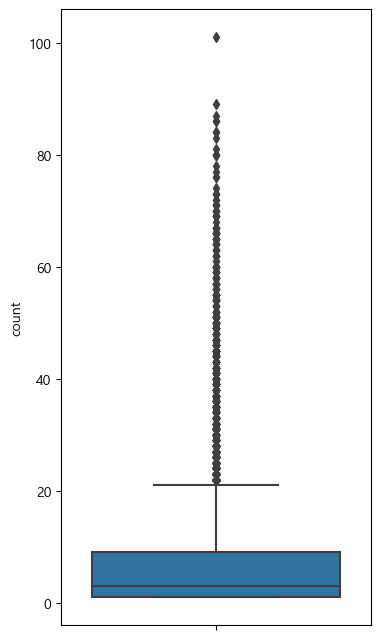

In [186]:
plt.figure(figsize=(4,8))
sns.boxplot(data=rfm_df, y='Frequency')
plt.ylabel('count')
plt.show()

In [187]:
rfm_df[rfm_df['Frequency'] >= 20].shape

(2322, 4)

In [188]:
rfm_df['Frequency'].min(), rfm_df['Frequency'].max(), rfm_df['Frequency'].mean().round(2), rfm_df['Frequency'].median()

(1, 101, 7.42, 3.0)

In [189]:
rfm_df['Frequency_adj'] = rfm_df['Frequency'].apply(lambda x: 21 if x>=21 else x)

In [190]:
# quantile binning(값이 비슷하게)
q_binned = pd.qcut(rfm_df['Frequency_adj'], q=3)
q_binned.value_counts().sort_index()

Frequency_adj
(0.999, 2.0]    9677
(2.0, 6.0]      5706
(6.0, 21.0]     7399
Name: count, dtype: int64

In [191]:
# quantile binning(값이 비슷하게)
u_binned = pd.cut(rfm_df['Frequency_adj'], bins=20)
u_binned.value_counts().sort_index()

Frequency_adj
(0.98, 2.0]     9677
(2.0, 3.0]      2257
(3.0, 4.0]      1576
(4.0, 5.0]      1092
(5.0, 6.0]       781
(6.0, 7.0]       703
(7.0, 8.0]       542
(8.0, 9.0]       543
(9.0, 10.0]      443
(10.0, 11.0]     412
(11.0, 12.0]     390
(12.0, 13.0]     353
(13.0, 14.0]     342
(14.0, 15.0]     339
(15.0, 16.0]     265
(16.0, 17.0]     293
(17.0, 18.0]     226
(18.0, 19.0]     226
(19.0, 20.0]     186
(20.0, 21.0]    2136
Name: count, dtype: int64

In [192]:
# rfm_df['F'] = pd.cut(rfm_df['Frequency_adj'], bins=5, labels=[1,2,3,4,5])

In [193]:
def assign_F(frequency):
    if frequency <= 5:
        return 1
    elif frequency <= 40:
        return 2
    else:
        return 3

rfm_df['F'] = rfm_df['Frequency'].apply(assign_F)

In [194]:
rfm_df['F'].value_counts()

F
1    14602
2     7802
3      378
Name: count, dtype: int64

### Monetary grading

In [195]:
def assign_M(Monetary):
    if Monetary <= 70000:
        return 1
    elif Monetary <= 330000:
        return 2
    else:
        return 3

rfm_df['M'] = rfm_df['Monetary'].apply(assign_M)

In [196]:
rfm_df['M'].value_counts()

M
1    19410
2     3274
3       98
Name: count, dtype: int64

### RFM score 생성

In [197]:
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

rfm_df.sample(5)

,Recency,Frequency,Monetary,R,Frequency_adj,F,M,RFM_Score
USER_ID_hash,,,,,,,,
1946f820e44266ceb73042bf3fd43167,3,3,9760,3,3,1,1,5
acad22d1bc8ebacd90341885d7734f79,20,9,3454,3,9,2,1,6
a55af8850dbe4750d7b70d5a224ee74e,39,9,28335,2,9,2,1,5
0d8a1643e756bfccd8486f1946008ac7,142,3,68470,1,3,1,1,3
242bee1dc2265a11393ea19e2233fcc1,80,2,1001,2,2,1,1,4


In [198]:
rfm_df.groupby(['RFM_Score'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
3,237.126802,1.881043,7230.668787
4,89.196957,4.030155,16000.410486
5,37.875975,6.777534,25252.610136
6,21.636228,14.184117,57400.210291
7,10.875743,23.108050,128740.473798
8,8.156463,49.700680,216824.010204
9,6.086207,60.896552,462755.879310


In [199]:
rfm_df['RFM_Score'].value_counts().sort_index()


RFM_Score
3    9432
4    3681
5    4104
6    3362
7    1851
8     294
9      58
Name: count, dtype: int64

## RFM 기반 고객 분류
* 3\~4: 이탈고객
* 5\~7: 잠재활성가능고객
* 8\~9: 충성고객
---
다만 중간층고객을 R/F/M 각각의 세부수치로 할지 그냥 RFM score로 할지는 고민중  
RFM score로만 하기에는 score:5인 집단이 조금 애매함  
그렇다고 세부수치로 하기에는 정확한 근거가 없음. RFM score별 집단 평균으로 해봤는데 평균이라 그런지 분류가 제대로 안 됨

In [ ]:
# 예시코드
'''
def classify_customer(row):
    r, f, m = row['R'], row['F'], row['M']

     # VIP
    if r >= 5 and f >= 5 and m >= 5:
        return 'VIP'
    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상
    elif r <= 3 and (f >= 4 and m >= 4):
        return 'VIP이탈고객'
    elif f >= 4 and r >= 4 and m >= 4:
        return '충성고객'
    elif f >= 3 and r >= 3 and m >= 3:
        return '충성예정고객'
    elif r <= 2 and f >= 3:
        return '충성이탈예정고객'
    else:
        return '일반고객'  # 이외의 경우를 위한 기본값
'''
# rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)

In [201]:
def classify_customer(df):
    score = df['RFM_Score']
    r, f, m = df['Recency'], df['Frequency'], df['Monetary']
    
     # VIP
    if score >= 8:
        return '충성고객'
    # elif r<=38 and f>=14 and m>=57400:
    #     return '중간고객'
    elif score >= 5:
        return '일반고객'
    else :
        return '저활성고객'

rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)

In [202]:
rfm_df.head()

,Recency,Frequency,Monetary,R,Frequency_adj,F,M,RFM_Score,고객등급
USER_ID_hash,,,,,,,,,
0000b53e182165208887ba65c079fc21,275,1,4920,1,1,1,1,3,저활성고객
00035b86e6884589ec8d28fbf2fe7757,87,1,1620,2,1,1,1,4,저활성고객
0005b1068d5f2b8f2a7c978fcfe1ca06,311,2,53660,1,2,1,1,3,저활성고객
000cc06982785a19e2a2fdb40b1c9d59,31,21,54606,2,21,2,1,5,일반고객
0013518e41c416cd6a181d277dd8ca0b,59,4,33095,2,4,1,1,4,저활성고객


In [203]:
rfm_df.groupby(['고객등급'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
고객등급,,,
일반고객,26.651819,12.694537,57412.776216
저활성고객,195.600854,2.484329,9692.456265
충성고객,7.815341,51.545455,257346.875000


In [204]:
rfm_df['고객등급'].value_counts()

고객등급
저활성고객    13113
일반고객      9317
충성고객       352
Name: count, dtype: int64

## VIP 세그먼트 특징
* 구매행동지표  
  총구매금액  
  건당평균구매금액: 소비타입(고가/저가선호)  
  평균할인율: 소비타입(할인민감층/할인둔감층)  
  구매카테고리개수: 카테고리 다양도  
  구매지역패턴: 지역 다양도(small_area_name, 가장 세부적이므로 선호지역의 다양성을 확인하기 좋음)  
  재구매주기  
  ~~사용가능주기선호: 장기/단기 선호~~ 결측치 많음  
* 인구통계  
  성별  
  연령대  
  가입일
---
구매행동지표 -> df_detail(coupon_detail_train/test.csv), df_list(coupon_list_train/test.csv)  
인구통계 -> df_user(user_list.csv)

In [205]:
# VIP 먼저 특징분석
vip_df = rfm_df[rfm_df['고객등급']=='충성고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [206]:
vip_df.sample()

,Recency,Frequency,Monetary,고객등급
USER_ID_hash,,,,
23baa0e691812e15c10016b6e6ab2e1b,4,44,185751,충성고객


In [207]:
vip_df['고객등급'].unique()

array(['충성고객'], dtype=object)

In [208]:
# USER_ID_hash가 index이므로 column으로 잠시 변환
vip_df = vip_df.reset_index()

In [209]:
vip_df.sample()

,USER_ID_hash,Recency,Frequency,Monetary,고객등급
330,f2bb47bc731f14558c124ddf783f35d4,20,59,188827,충성고객


### Merging(df_detail, df_list): 구매기록

In [210]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [211]:
vip_purchase = vip_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')

In [212]:
vip_purchase.shape[0], len(vip_purchase['PURCHASEID_hash'].unique())

(18144, 18144)

In [213]:
vip_purchase = vip_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')

In [214]:
vip_purchase.shape[0], len(vip_purchase['PURCHASEID_hash'].unique())

(18144, 18144)

In [215]:
vip_purchase.sample(3).T

,6454,17249,13399
USER_ID_hash,61ce90f15c5d910a9bee2c04121425f9,f43764b8f5fd705d56a0d2a16199cf76,bea38e36939cdcf8f804a7a210b2e802
Recency,1,4,12
Frequency,60,37,42
Monetary,235470,351127,300171
고객등급,충성고객,충성고객,충성고객
ITEM_COUNT,2,1,1
I_DATE,2011-08-05,2012-04-06,2012-05-29
COUPON_ID_hash,3783d2ba40947b3cfa8111ff05c6af0e,f1985daf099c2eb8583ab1ba3f0c8cbd,923d0d6b1e86ffbd9222b5714c1a9da4
PURCHASEID_hash,715adf65d3f870cbbf0bd216313de364,d5d1c1fbf5c02ba2963a27ff995d08ac,5b0d96f2604e793d21de2426ea8feb66
GENRE_NAME,宅配,宅配,宅配


In [216]:
vip_purchase['GENRE_NAME'].unique()

array(['宅配', 'グルメ', 'ギフトカード', 'その他のクーポン', 'レジャー', 'ホテル・旅館', 'エステ', 'レッスン',
       'ヘアサロン', 'ネイル・アイ', 'リラクゼーション', 'ビューティー', '健康・医療'], dtype=object)

In [217]:
genre_en = {
    '宅配': 'Delivery service',
    'グルメ': 'Food',
    'ギフトカード': 'Gift card',
    'その他のクーポン': 'Other coupon',
    'レッスン': 'Lesson',
    'ホテル・旅館': 'Hotel and Japanese hotel',
    'エステ': 'Spa',
    'レジャー': 'Leisure',
    'ヘアサロン': 'Hair salon',
    'ネイル・アイ': 'Nail and eye salon',
    'リラクゼーション': 'Relaxation',
    'ビューティー': 'Beauty',
    '健康・医療': 'Health and medical'
}

vip_purchase['GENRE_NAME'] = vip_purchase['GENRE_NAME'].map(genre_en)

In [218]:
vip_purchase['GENRE_NAME'].unique()

array(['Delivery service', 'Food', 'Gift card', 'Other coupon', 'Leisure',
       'Hotel and Japanese hotel', 'Spa', 'Lesson', 'Hair salon',
       'Nail and eye salon', 'Relaxation', 'Beauty', 'Health and medical'],
      dtype=object)

In [219]:
vip_purchase['small_area_name'].unique()

array(['銀座・新橋・東京・上野', '滋賀', '兵庫', '静岡', '沖縄', '千葉', '新宿・高田馬場・中野・吉祥寺',
       '恵比寿・目黒・品川', '渋谷・青山・自由が丘', '横浜', '北海道', '池袋・神楽坂・赤羽', '埼玉', '愛媛',
       'キタ', '京都', '岡山', '愛知', '和歌山', 'ミナミ他', '福岡', '香川', '川崎・湘南・箱根他',
       '赤坂・六本木・麻布', '奈良', '岐阜', '宮城', '新潟', '三重', '群馬', '茨城', '広島', '佐賀',
       '立川・町田・八王子他', '長野', '石川', '長崎', '福井', '山口', '秋田', '宮崎', '栃木', '富山',
       '徳島', '鳥取', '青森', '鹿児島', '福島', '大分', '高知', '島根', '山形', '山梨', '岩手',
       '熊本'], dtype=object)

In [220]:
df_list['large_area_name'].unique()

array(['関東', '関西', '東海', '北海道', '九州・沖縄', '東北', '四国', '中国', '北信越'],
      dtype=object)

In [221]:
df_list['ken_name'].unique()

array(['埼玉県', '千葉県', '東京都', '京都府', '愛知県', '神奈川県', '北海道', '福岡県', '栃木県',
       '大阪府', '宮城県', '福島県', '大分県', '高知県', '広島県', '新潟県', '岡山県', '愛媛県',
       '香川県', '徳島県', '兵庫県', '岐阜県', '宮崎県', '長崎県', '石川県', '山形県', '静岡県',
       '青森県', '沖縄県', '秋田県', '長野県', '岩手県', '熊本県', '山口県', '佐賀県', '奈良県',
       '三重県', '群馬県', '和歌山県', '山梨県', '鳥取県', '鹿児島県', '福井県', '滋賀県', '富山県',
       '島根県', '茨城県'], dtype=object)

In [222]:
small_area_en = {
    '銀座・新橋・東京・上野': 'Ginza / Shimbashi / Tokyo / Ueno',
    '滋賀': 'Shiga',
    '兵庫': 'Hyogo',
    '静岡': 'Shizuoka',
    '沖縄': 'Okinawa',
    '千葉': 'Chiba',
    '新宿・高田馬場・中野・吉祥寺': 'Shinjuku / Takadanobaba / Nakano / Kichijoji',
    '恵比寿・目黒・品川': 'Ebisu / Meguro / Shinagawa',
    '渋谷・青山・自由が丘': 'Shibuya / Aoyama / Jiyugaoka',
    '横浜': 'Yokohama',
    '北海道': 'Hokkaido',
    '池袋・神楽坂・赤羽': 'Ikebukuro / Kagurazaka / Akabane',
    '埼玉': 'Saitama',
    '愛媛': 'Ehime',
    'キタ': 'Kita',
    '京都': 'Kyoto',
    '岡山': 'Okayama',
    '愛知': 'Aichi',
    '和歌山': 'Wakayama',
    'ミナミ他': 'Minami area',
    '福岡': 'Fukuoka',
    '香川': 'Kagawa',
    '川崎・湘南・箱根他': 'Kawasaki / Shonan / Hakone',
    '赤坂・六本木・麻布': 'Akasaka / Roppongi / Azabu',
    '奈良': 'Nara',
    '岐阜': 'Gifu',
    '宮城': 'Miyagi',
    '新潟': 'Niigata',
    '三重': 'Mie',
    '群馬': 'Gunma',
    '茨城': 'Ibaraki',
    '広島': 'Hiroshima',
    '佐賀': 'Saga',
    '立川・町田・八王子他': 'Tachikawa / Machida / Hachioji',
    '長野': 'Nagano',
    '石川': 'Ishikawa',
    '長崎': 'Nagasaki',
    '福井': 'Fukui',
    '山口': 'Yamaguchi',
    '秋田': 'Akita',
    '宮崎': 'Miyazaki',
    '栃木': 'Tochigi',
    '富山': 'Toyama',
    '徳島': 'Tokushima',
    '鳥取': 'Tottori',
    '青森': 'Aomori',
    '鹿児島': 'Kagoshima',
    '福島': 'Fukushima',
    '大分': 'Oita',
    '高知': 'Kochi',
    '島根': 'Shimane',
    '山形': 'Yamagata',
    '山梨': 'Yamanashi',
    '岩手': 'Iwate',
    '熊本': 'Kumamoto'
}
vip_purchase['small_area_name'] = vip_purchase['small_area_name'].map(small_area_en)

In [223]:
vip_purchase['small_area_name'].unique()

array(['Ginza / Shimbashi / Tokyo / Ueno', 'Shiga', 'Hyogo', 'Shizuoka',
       'Okinawa', 'Chiba', 'Shinjuku / Takadanobaba / Nakano / Kichijoji',
       'Ebisu / Meguro / Shinagawa', 'Shibuya / Aoyama / Jiyugaoka',
       'Yokohama', 'Hokkaido', 'Ikebukuro / Kagurazaka / Akabane',
       'Saitama', 'Ehime', 'Kita', 'Kyoto', 'Okayama', 'Aichi',
       'Wakayama', 'Minami area', 'Fukuoka', 'Kagawa',
       'Kawasaki / Shonan / Hakone', 'Akasaka / Roppongi / Azabu', 'Nara',
       'Gifu', 'Miyagi', 'Niigata', 'Mie', 'Gunma', 'Ibaraki',
       'Hiroshima', 'Saga', 'Tachikawa / Machida / Hachioji', 'Nagano',
       'Ishikawa', 'Nagasaki', 'Fukui', 'Yamaguchi', 'Akita', 'Miyazaki',
       'Tochigi', 'Toyama', 'Tokushima', 'Tottori', 'Aomori', 'Kagoshima',
       'Fukushima', 'Oita', 'Kochi', 'Shimane', 'Yamagata', 'Yamanashi',
       'Iwate', 'Kumamoto'], dtype=object)

In [224]:
vip_purchase.sample(3).T

,17124,5354,3952
USER_ID_hash,f3453d88f152914bd89ab4414e88ba5b,505f6ccbc52335a193b41b8110d2c557,3e9181d60b09202195e00b4022f3dfbf
Recency,4,23,5
Frequency,44,41,66
Monetary,248328,204003,149121
고객등급,충성고객,충성고객,충성고객
ITEM_COUNT,2,1,1
I_DATE,2012-03-08,2012-02-03,2012-05-18
COUPON_ID_hash,9c2b9b5a5b9f20f4e86ffb740b42e1fe,724c7633055ecdeca9678f18d808286b,f771f8eba51adf8aa8e9962bc98c51bf
PURCHASEID_hash,620ea9c57f9827215097cb8c1bd12a3c,f35a29b0b17c30bcda1f3b2c8598ea22,da70eddfdac15a702ba3df11d11ce167
GENRE_NAME,Food,Lesson,Food


In [225]:
vip_purchase['I_DATE'].dtype

dtype('O')

In [ ]:
vip_purchase['I_DATE'] = pd.to_datetime(vip_purchase['I_DATE'])

In [ ]:
vip_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### VIP 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [ ]:
vip_total_amount = vip_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].sum()
vip_avg_amount = vip_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].mean()
vip_avg_discount = vip_purchase.groupby('USER_ID_hash')['PRICE_RATE'].mean()
vip_order_count = vip_purchase.groupby('USER_ID_hash')['PURCHASEID_hash'].nunique()
vip_item_count = vip_purchase.groupby('USER_ID_hash')['ITEM_COUNT'].sum()
vip_category_unique = vip_purchase.groupby('USER_ID_hash')['GENRE_NAME'].nunique()
vip_area_unique = vip_purchase.groupby('USER_ID_hash')['small_area_name'].nunique()
def avg_repurchase_cycle(date):
    date = date.sort_values() # 날짜 정렬
    '''
    date.diff() # 인접 날짜끼리 차이 계산..! 이런 간단한 함수가 있었다니
    dropna() # 근데 처음과 끝은 인접날짜가 없으므로 NaT 널값이 나옴. 그거 제거
    dt.days() # 계산한 날짜차이를 days로 변환
    '''
    if len(date) <= 1: # 구매 횟수 1회인 경우는 계산불가
        return None
    return (date.diff().dropna().dt.days.mean())

vip_purchase_cycle = vip_purchase.groupby('USER_ID_hash')['I_DATE'].apply(avg_repurchase_cycle)

In [ ]:
vip_metrics = pd.DataFrame({
    'USER_ID_hash': vip_total_amount.index,
    '구매횟수': vip_order_count.values,
    '구매쿠폰개수': vip_item_count.values,
    '총구매금액': vip_total_amount.values,
    '평균구매금액': vip_avg_amount.values,
    '평균할인율': vip_avg_discount.values,
    '카테고리다양도': vip_category_unique.values,
    '지역다양도': vip_area_unique.values,
    '재구매주기': vip_purchase_cycle.values,
    # '평균사용기간': g_valid_period.values
})

In [ ]:
vip_metrics.sample(2).T

,271,111
USER_ID_hash,c7a57727a0f5f4c3e08021d75165e770,56d7bac311d436759d2943fd5191ce75
구매횟수,50,36
구매쿠폰개수,104,52
총구매금액,352203,395010
평균구매금액,7044.06,10972.5
평균할인율,58.82,61.361111
카테고리다양도,5,4
지역다양도,7,17
재구매주기,6.571429,8.514286


In [ ]:
vip_metrics[vip_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(vip_metrics)

In [ ]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [ ]:
vip_df = vip_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')

In [ ]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [ ]:
vip_df.sample(3)

,USER_ID_hash,Recency,Frequency,Monetary,고객등급,SEX_ID,AGE
248,b334f741ecf65d63719adc166a2e75ba,1,50,235701,충성고객,f,34
131,64695e863d3730d31c0d3c0836c51e86,3,70,383625,충성고객,f,29
64,346d804cc08a534269c4b753f068a856,8,51,456903,충성고객,m,66


In [ ]:
vip_df = vip_df.merge(vip_metrics, on='USER_ID_hash', how='left')

In [ ]:
vip_df.shape[0], len(vip_df['USER_ID_hash'].unique())

(352, 352)

In [ ]:
vip_df.sample(3).T

,1,48,287
USER_ID_hash,01cdbe4f8554d0c6675a7b07774037f3,29d5804d2ee09eddaad3bdc2918a1254,d408d1b6fb25178516cd63778c396720
Recency,6,13,8
Frequency,49,69,39
Monetary,210306,202930,425675
고객등급,충성고객,충성고객,충성고객
SEX_ID,f,f,m
AGE,50,55,54
구매횟수,49,69,39
구매쿠폰개수,81,104,52
총구매금액,210306,202930,425675


In [ ]:
vip_df['AGE_GROUP'] = (vip_df['AGE']//10)*10

In [ ]:
vip_df.sample(3).T

,233,267,216
USER_ID_hash,a886947deada0e137f4289bfba008baa,c488542d906f7b976df04e2d75f6616e,9f2dedbdf52b10bccb2a53ca4904f815
Recency,1,1,2
Frequency,69,32,54
Monetary,379488,592191,380201
고객등급,충성고객,충성고객,충성고객
SEX_ID,f,m,f
AGE,59,61,40
구매횟수,69,32,54
구매쿠폰개수,83,38,68
총구매금액,379488,592191,380201


In [ ]:
vip_df["AGE_GROUP"].value_counts()

AGE_GROUP
50    122
40     99
30     62
60     43
20     19
70      7
Name: count, dtype: int64

In [ ]:
vip_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

,구매횟수,구매쿠폰개수,총구매금액,평균구매금액,평균할인율,카테고리다양도,재구매주기
AGE_GROUP,,,,,,,
20,51.26,68.63,249911.26,4967.93,61.32,7.16,5.95
30,52.95,71.89,264616.53,5673.99,62.07,6.45,5.93
40,51.81,76.05,247896.73,5289.53,60.82,5.92,6.49
50,52.25,82.88,255042.19,5075.33,59.96,5.63,6.24
60,48.02,73.65,279459.44,6246.60,60.54,4.72,6.43
70,45.43,76.14,251126.00,6192.08,60.27,4.71,7.48


### VIP 분석 시각화
1. Rader Chart: minmax, standard 적용
2. Heat Map: 각 지표는 서로 다른 단위라 지표간 비교는 불가  
   “구매금액_log = 0.35 → 전체 VIP 중 하위 35% 수준” (O)  
   “구매쿠폰개수 = 0.56 → 전체 VIP 중 상위 56% 수준” (O)  
   "구매금액_log = 0.35, 구매쿠폰개수 = 0.56 → 구매금액이 적고 쿠폰을 많이 샀다” (X)  
3. Parallel Coordinates

In [ ]:
import matplotlib.font_manager as fm

font_path = '/kaggle/input/font-kr/MALGUN.TTF'
fm.fontManager.addfont(font_path)
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
print(fontprop.get_name())

Malgun Gothic


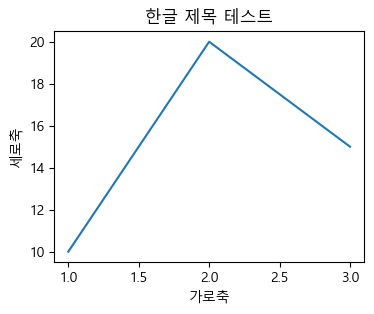

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.plot([1, 2, 3], [10, 20, 15])
plt.title('한글 제목 테스트')
plt.xlabel('가로축')
plt.ylabel('세로축')
plt.show()

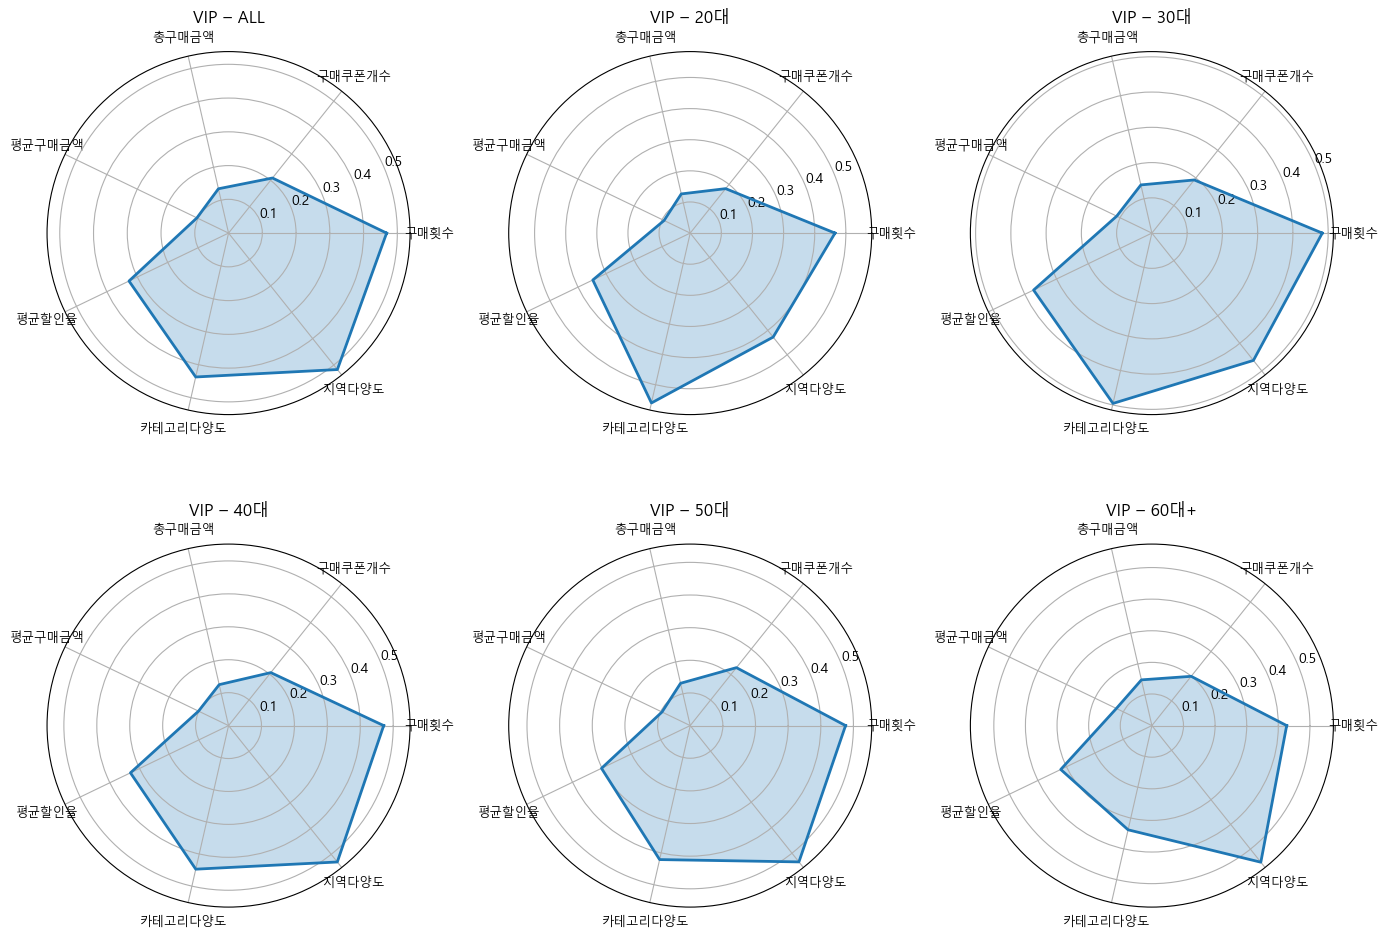

In [302]:
cols_vip = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

vip_rader = vip_df.copy()

def age_group_func(age):
    if age < 30: return "20대"
    elif age < 40: return "30대"
    elif age < 50: return "40대"
    elif age < 60: return "50대"
    else: return "60대+"
vip_rader["AGE_GROUP2"] = vip_rader["AGE_GROUP"].apply(age_group_func)

groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# Rader Chart
def plot_radar(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

# 다른 지표간 비교를 위해 Scaling
scaler = MinMaxScaler()
# 이상치 너무 큰 값이 있으면 눌리는 현상이 나옴
minmax_scaled_all = scaler.fit_transform(vip_rader[cols_vip])
minmax_scaled_df = pd.DataFrame(minmax_scaled_all, columns=cols_vip)
minmax_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = minmax_scaled_df[cols_vip].mean().values
    else:
        radar_values = minmax_scaled_df[minmax_scaled_df["AGE_GROUP2"] == group][cols_vip].mean().values

    plot_radar(ax, radar_values, cols_vip, f"VIP – {group}")

plt.tight_layout()
plt.show()

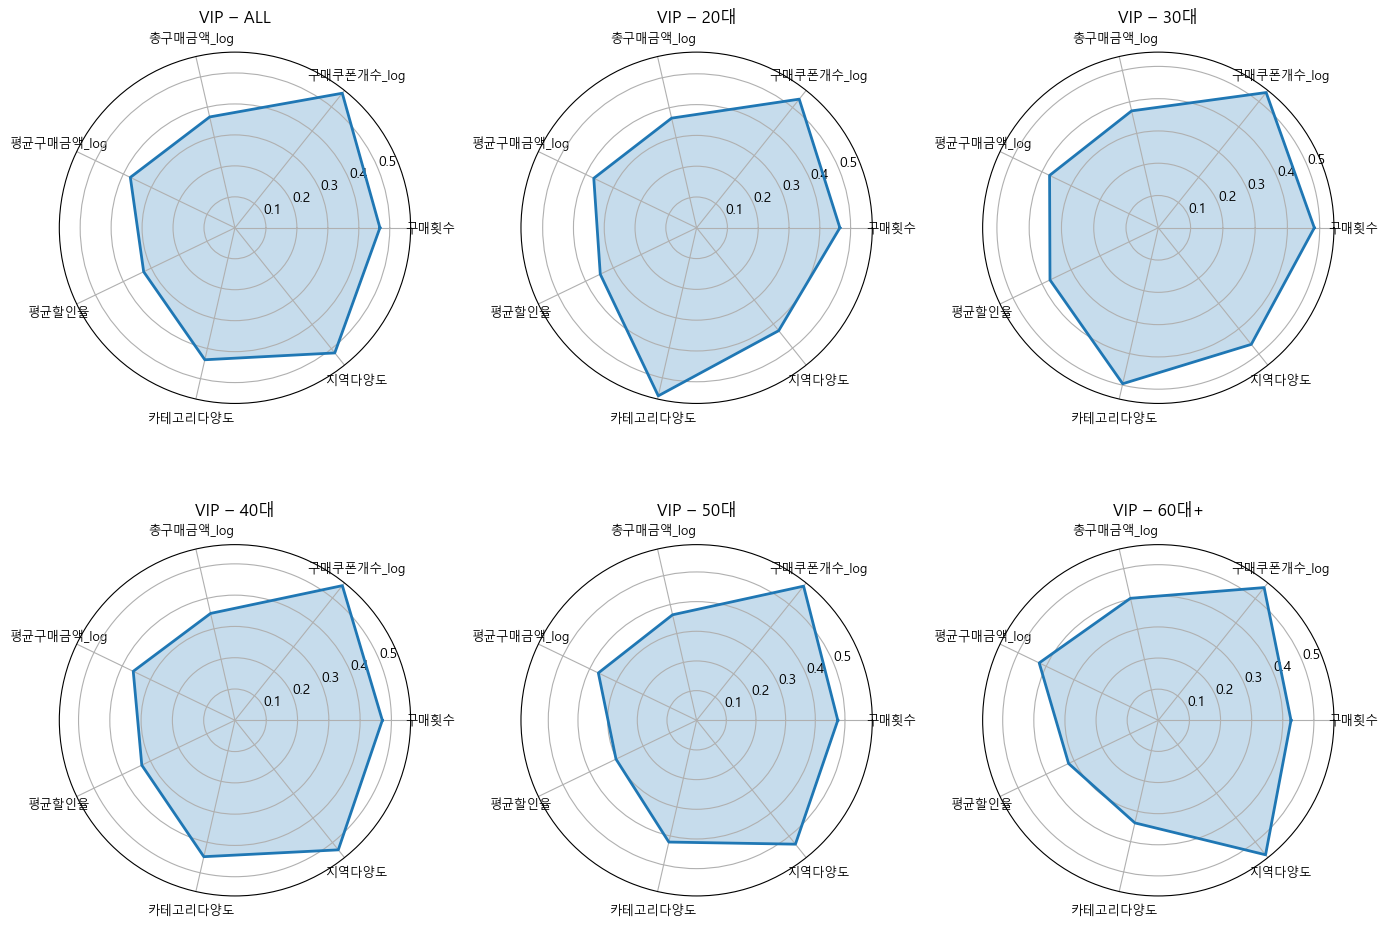

In [262]:
cols_vip_mod = [
    "구매횟수",
    "구매쿠폰개수_log",
    "총구매금액_log",
    "평균구매금액_log",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
]

vip_rader = vip_df.copy()

def age_group_func(age):
    if age < 30: return "20대"
    elif age < 40: return "30대"
    elif age < 50: return "40대"
    elif age < 60: return "50대"
    else: return "60대+"
vip_rader["AGE_GROUP2"] = vip_rader["AGE_GROUP"].apply(age_group_func)

groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Scaling
scaler = MinMaxScaler()
# 이상치 너무 큰 값이 있으면 눌리는 현상이 나옴
vip_rader["총구매금액_log"] = np.log1p(vip_rader["총구매금액"])
vip_rader["평균구매금액_log"] = np.log1p(vip_rader["평균구매금액"])
vip_rader["구매쿠폰개수_log"] = np.log1p(vip_rader["구매쿠폰개수"])

minmax_scaled_all = scaler.fit_transform(vip_rader[cols_vip_mod])
minmax_scaled_df = pd.DataFrame(minmax_scaled_all, columns=cols_vip_mod)
minmax_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = minmax_scaled_df[cols_vip_mod].mean().values
    else:
        radar_values = minmax_scaled_df[minmax_scaled_df["AGE_GROUP2"] == group][cols_vip_mod].mean().values

    plot_radar(ax, radar_values, cols_vip_mod, f"VIP – {group}")

plt.tight_layout()
plt.show()

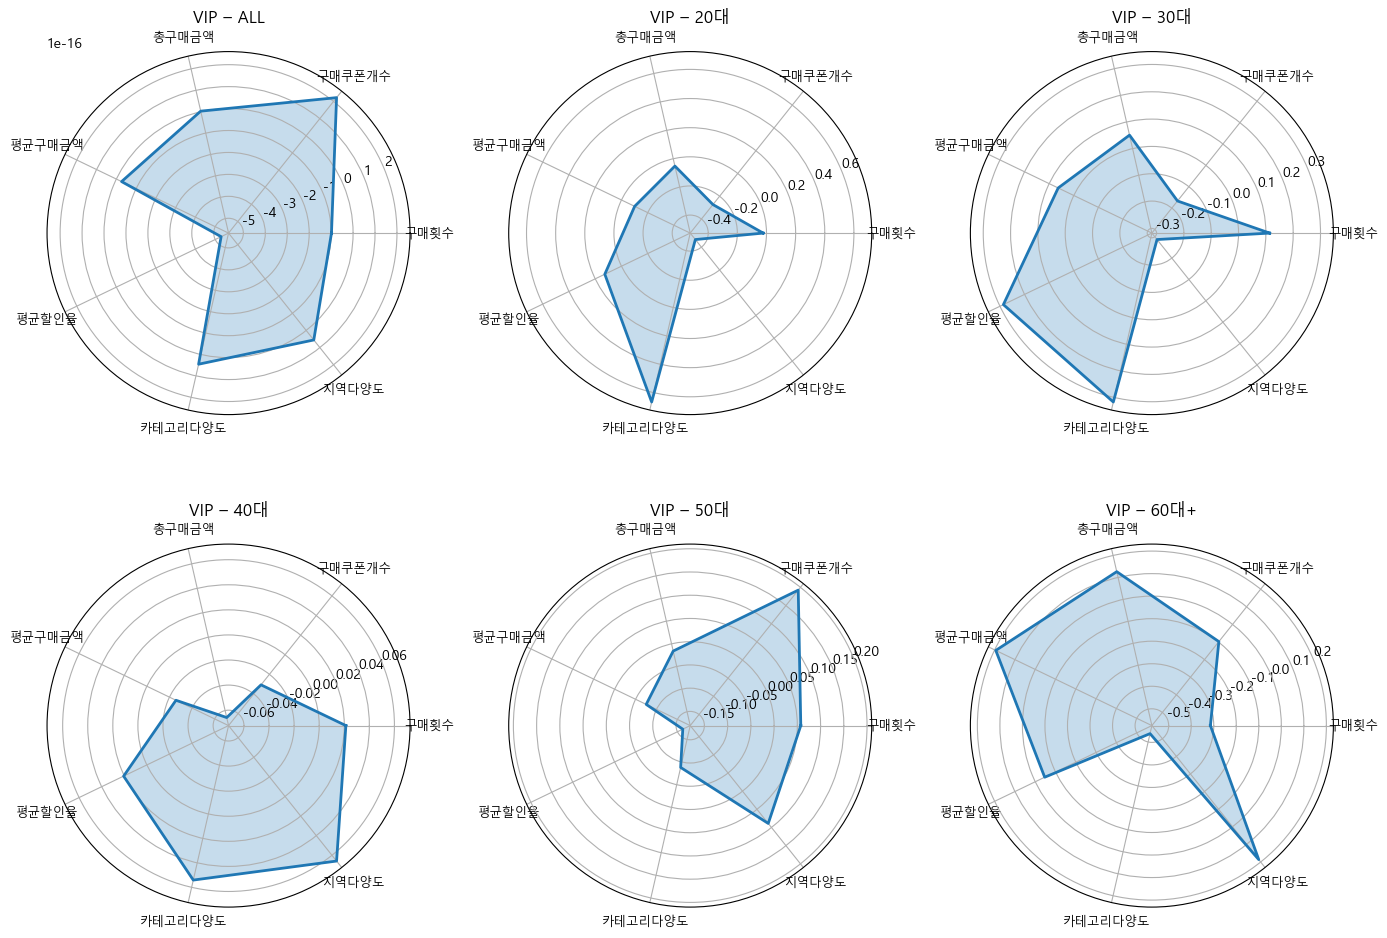

In [252]:
# Standard Scaler (연령대간 비교 불가. 각 연령대 내에서 지표들이 평균대비 얼마나 크고 작은지만 가능)
scaler = StandardScaler()
standard_scaled_all = scaler.fit_transform(vip_rader[cols_vip])
standard_scaled_df = pd.DataFrame(standard_scaled_all, columns=cols_vip)
standard_scaled_df["AGE_GROUP2"] = vip_rader["AGE_GROUP2"]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, group in enumerate(groups):
    ax = axes[idx]
    if group == "ALL":
        radar_values = standard_scaled_df[cols_vip].mean().values
    else:
        radar_values = standard_scaled_df[standard_scaled_df["AGE_GROUP2"] == group][cols_vip].mean().values

    plot_radar(ax, radar_values, cols_vip, f"VIP – {group}")

plt.tight_layout()
plt.show()

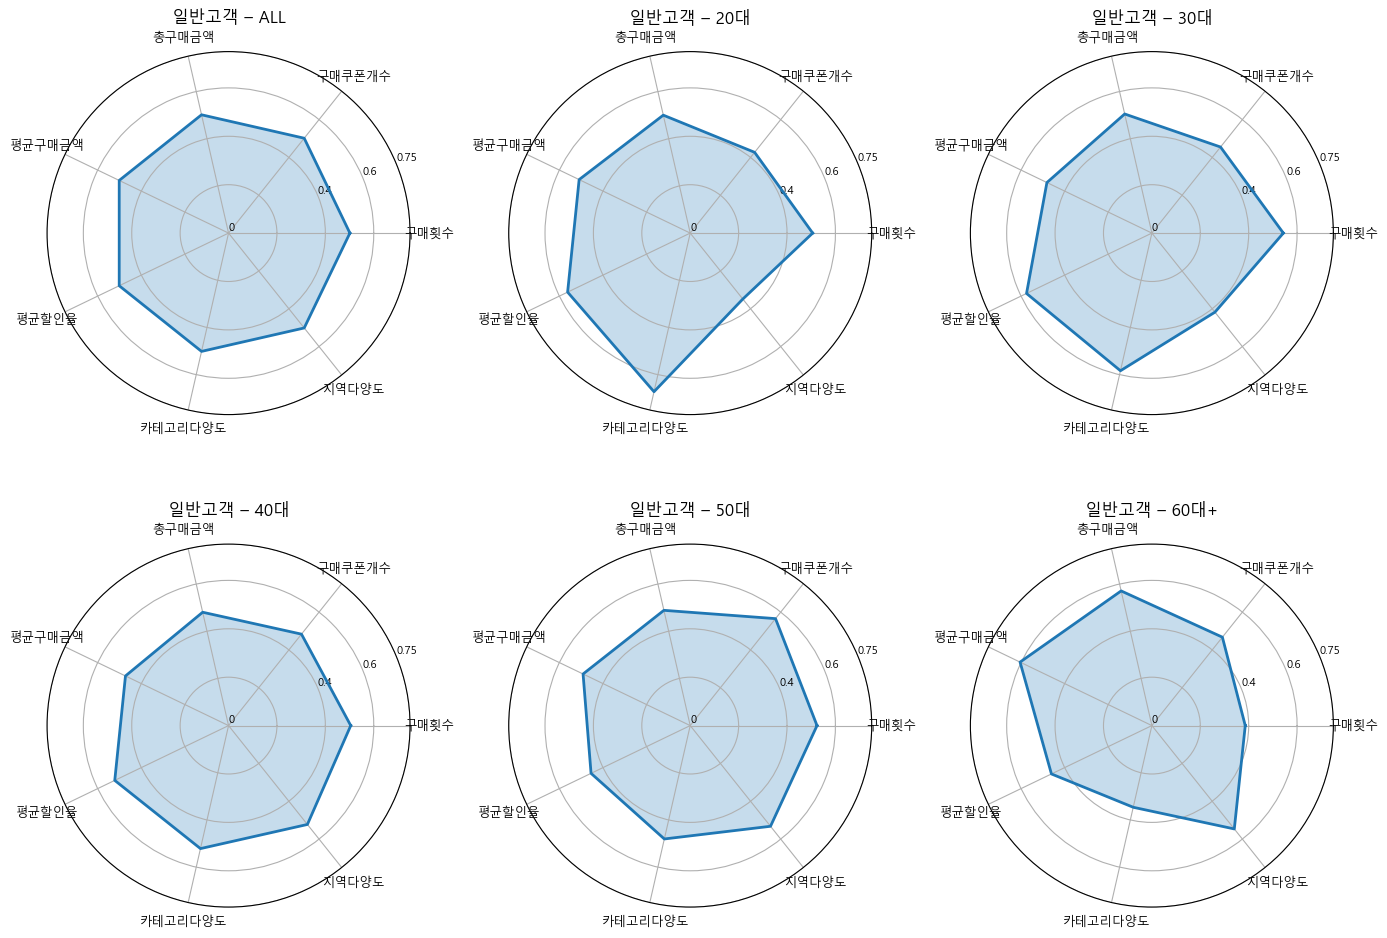

In [303]:
# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_vip:
    vip_rader[col + "_pct"] = vip_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_vip]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


def plot_radar_fixed_range(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # 라벨
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

    # 범위 고정
    ax.set_ylim(0, 0.75)                       # 최소 0, 최대 1로 고정
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.75]) # 동일 tick
    ax.set_yticklabels(["0", "", "0.4", "0.6", "0.75"], fontsize=8)

for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = vip_rader[cols_pct].mean().values
    else:
        radar_values = vip_rader[vip_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_vip, f"일반고객 – {group}")

plt.tight_layout()
plt.show()

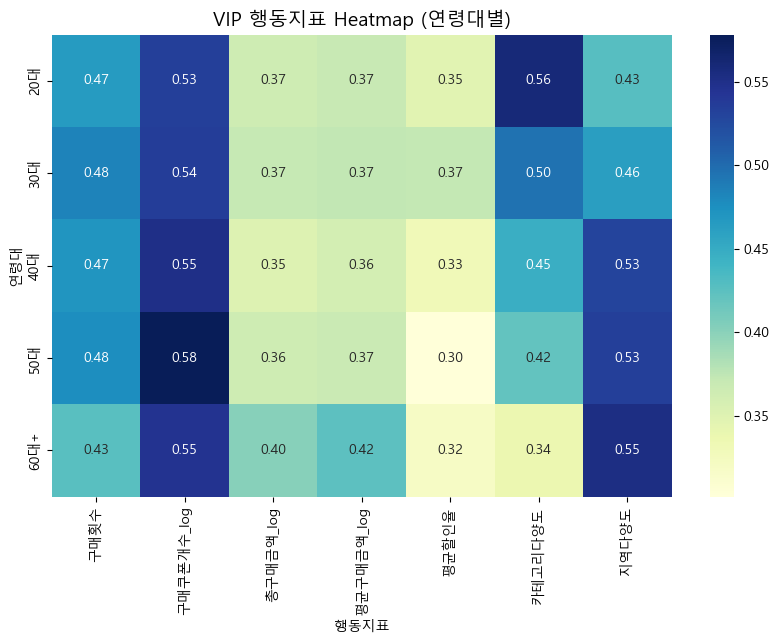

In [263]:
pivot = minmax_scaled_df.groupby("AGE_GROUP2")[cols_vip_mod].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("VIP 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

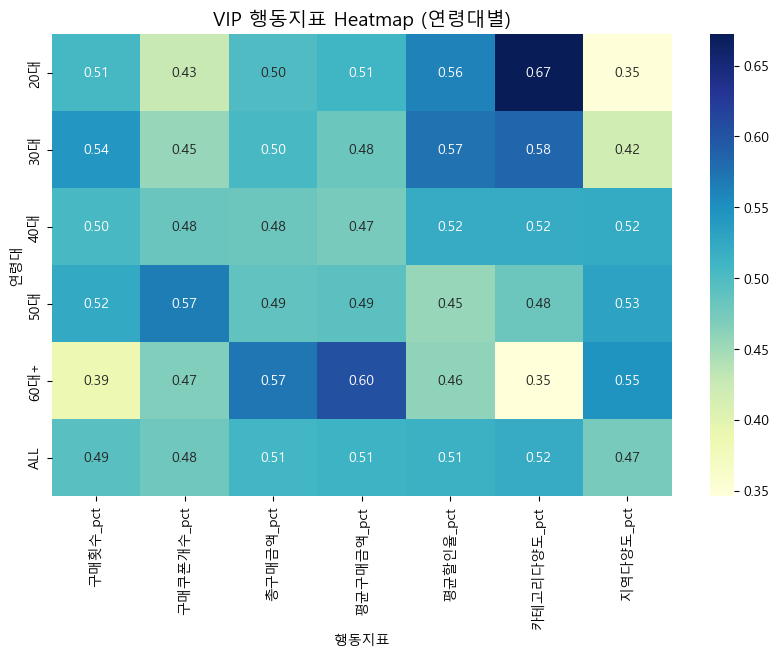

In [305]:
pivot = vip_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("VIP 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 일반고객 세그먼트 특징
* 구매행동지표  
  총구매금액  
  건당평균구매금액: 소비타입(고가/저가선호)  
  평균할인율: 소비타입(할인민감층/할인둔감층)  
  구매카테고리개수: 카테고리 다양도  
  구매지역패턴: 지역 다양도(small_area_name, 가장 세부적이므로 선호지역의 다양성을 확인하기 좋음)  
  재구매주기  
  ~~사용가능주기선호: 장기/단기 선호~~ 결측치 많음  
* 인구통계  
  성별  
  연령대  
  가입일
---
구매행동지표 -> df_detail(coupon_detail_train/test.csv), df_list(coupon_list_train/test.csv)  
인구통계 -> df_user(user_list.csv)

In [264]:
medium_df = rfm_df[rfm_df['고객등급']=='일반고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [265]:
medium_df = medium_df.reset_index()

### Merging(df_detail, df_list): 구매기록

In [266]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [267]:
medium_purchase = medium_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')

In [268]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [269]:
medium_purchase = medium_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')

In [270]:
medium_purchase.shape[0], len(medium_purchase['PURCHASEID_hash'].unique())

(118275, 118275)

In [271]:
medium_purchase['GENRE_NAME'] = medium_purchase['GENRE_NAME'].map(genre_en)
medium_purchase['GENRE_NAME'].unique()

array(['Gift card', 'Delivery service', 'Hair salon', 'Other coupon',
       'Food', 'Leisure', 'Relaxation', 'Hotel and Japanese hotel', 'Spa',
       'Lesson', 'Nail and eye salon', 'Health and medical', 'Beauty'],
      dtype=object)

In [272]:
medium_purchase['small_area_name'] = medium_purchase['small_area_name'].map(small_area_en)
medium_purchase['small_area_name'].unique()

array(['Ginza / Shimbashi / Tokyo / Ueno', 'Kita', 'Hokkaido',
       'Shinjuku / Takadanobaba / Nakano / Kichijoji',
       'Ebisu / Meguro / Shinagawa', 'Minami area', 'Yokohama', 'Hyogo',
       'Ikebukuro / Kagurazaka / Akabane', 'Gifu', 'Ibaraki', 'Kagawa',
       'Saitama', 'Shibuya / Aoyama / Jiyugaoka', 'Fukuoka', 'Nagano',
       'Tottori', 'Okayama', 'Aichi', 'Tachikawa / Machida / Hachioji',
       'Tochigi', 'Yamagata', 'Tokushima', 'Saga', 'Nara', 'Chiba',
       'Akasaka / Roppongi / Azabu', 'Yamaguchi', 'Shizuoka', 'Kyoto',
       'Kawasaki / Shonan / Hakone', 'Shiga', 'Miyagi', 'Hiroshima',
       'Gunma', 'Niigata', 'Nagasaki', 'Kagoshima', 'Akita', 'Aomori',
       'Iwate', 'Oita', 'Kumamoto', 'Fukui', 'Mie', 'Kochi', 'Fukushima',
       'Okinawa', 'Yamanashi', 'Wakayama', 'Ishikawa', 'Toyama', 'Ehime',
       'Shimane', 'Miyazaki'], dtype=object)

In [273]:
medium_purchase['I_DATE'].dtype

dtype('O')

In [274]:
medium_purchase['I_DATE'] = pd.to_datetime(medium_purchase['I_DATE'])

In [275]:
medium_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### 일반고객 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [276]:
def get_purchase_metrics(df_purchase):
    df_total_amount = df_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].sum()
    df_avg_amount = df_purchase.groupby('USER_ID_hash')['PURCHASE_PRICE'].mean()
    df_avg_discount = df_purchase.groupby('USER_ID_hash')['PRICE_RATE'].mean()
    df_order_count = df_purchase.groupby('USER_ID_hash')['PURCHASEID_hash'].nunique()
    df_item_count = df_purchase.groupby('USER_ID_hash')['ITEM_COUNT'].sum()
    df_category_unique = df_purchase.groupby('USER_ID_hash')['GENRE_NAME'].nunique()
    df_area_unique = df_purchase.groupby('USER_ID_hash')['small_area_name'].nunique()
    df_purchase_cycle = df_purchase.groupby('USER_ID_hash')['I_DATE'].apply(avg_repurchase_cycle)

    df_metrics = pd.DataFrame({
        'USER_ID_hash': df_total_amount.index,
        '구매횟수': df_order_count.values,
        '구매쿠폰개수': df_item_count.values,
        '총구매금액': df_total_amount.values,
        '평균구매금액': df_avg_amount.values,
        '평균할인율': df_avg_discount.values,
        '카테고리다양도': df_category_unique.values,
        '지역다양도': df_area_unique.values,
        '재구매주기': df_purchase_cycle.values,
        # '평균사용기간': g_valid_period.values
    })

    return df_metrics

In [277]:
medium_metrics = get_purchase_metrics(medium_purchase)
medium_metrics.sample(3).T

,1388,5823,1564
USER_ID_hash,26d5233985846b4717191fc5193ab406,9f4c1bb7a57fbe969ee86ca8beee8a0a,2b135b71d2a3a59a785cc26fb88310ff
구매횟수,11,7,9
구매쿠폰개수,11,8,14
총구매금액,20951,40240,18210
평균구매금액,1904.636364,5748.571429,2023.333333
평균할인율,58.181818,60.857143,54.222222
카테고리다양도,4,2,5
지역다양도,7,6,5
재구매주기,29.2,31.5,38.375


In [278]:
medium_metrics[medium_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(medium_metrics)

In [279]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [280]:
medium_df = medium_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')

In [281]:
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [282]:
medium_df.sample(3)

,USER_ID_hash,Recency,Frequency,Monetary,고객등급,SEX_ID,AGE
4270,7738aa2bb055bd2114b4d8a90a74d25d,7,15,110040,일반고객,f,29
2947,524c16e2027902c2391b42f5ee6d783a,19,8,9422,일반고객,m,50
3832,6ba8e44bab4373cbf3f4738c769ec3e4,8,2,1871,일반고객,m,32


In [283]:
medium_df = medium_df.merge(medium_metrics, on='USER_ID_hash', how='left')
medium_df.shape[0], len(medium_df['USER_ID_hash'].unique())

(9317, 9317)

In [284]:
medium_df.sample(3).T

,803,7709,3258
USER_ID_hash,168a72646283406c38eba24436267d66,d2ddaf5b94658af7e822750aca3e48c3,5c0dc2842aa6c38a4ff29f07ee81a9b6
Recency,17,33,5
Frequency,12,36,15
Monetary,31880,114201,32290
고객등급,일반고객,일반고객,일반고객
SEX_ID,f,f,f
AGE,24,45,38
구매횟수,12,36,15
구매쿠폰개수,14,49,17
총구매금액,31880,114201,32290


In [285]:
medium_df['AGE_GROUP'] = (medium_df['AGE']//10)*10
medium_df.sample(3).T

,7953,4373,2762
USER_ID_hash,d99bf5752a054f886ceb09e221763327,7a1120b967b197c692213982fc9b2857,4da81c2c75f4088b2e3c9b9dc3c752a0
Recency,20,19,19
Frequency,5,4,15
Monetary,6018,37480,145204
고객등급,일반고객,일반고객,일반고객
SEX_ID,f,f,f
AGE,40,32,48
구매횟수,5,4,15
구매쿠폰개수,5,6,21
총구매금액,6018,37480,145204


In [286]:
medium_df["AGE_GROUP"].value_counts()

AGE_GROUP
40    2813
30    2430
50    1947
20    1059
60     891
70     152
10      23
80       2
Name: count, dtype: int64

In [287]:
medium_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

,구매횟수,구매쿠폰개수,총구매금액,평균구매금액,평균할인율,카테고리다양도,재구매주기
AGE_GROUP,,,,,,,
10,5.17,5.57,11084.22,3202.74,77.41,2.43,46.29
20,10.26,13.53,51322.38,4879.20,67.88,3.87,32.47
30,11.59,15.71,49767.42,4411.51,66.75,3.79,32.93
40,12.79,18.55,55236.96,4460.45,64.81,3.74,31.80
50,14.55,21.94,68223.66,4805.85,62.82,3.72,26.04
60,14.27,22.39,69027.30,4912.94,61.81,3.54,27.16
70,13.61,20.75,63186.95,4323.48,62.58,3.20,28.58
80,9.00,10.50,26949.00,5014.23,58.46,2.50,38.33


### 일반고객 분석 시각화
1. Rader Chart: percentile scaling 적용
2. Heat Map  
   같은 지표 내에서 연령대 간 상대적 위치를 비교  
   같은 연령대에서 지표 간 비교는 불가   
3. Parallel Coordinates

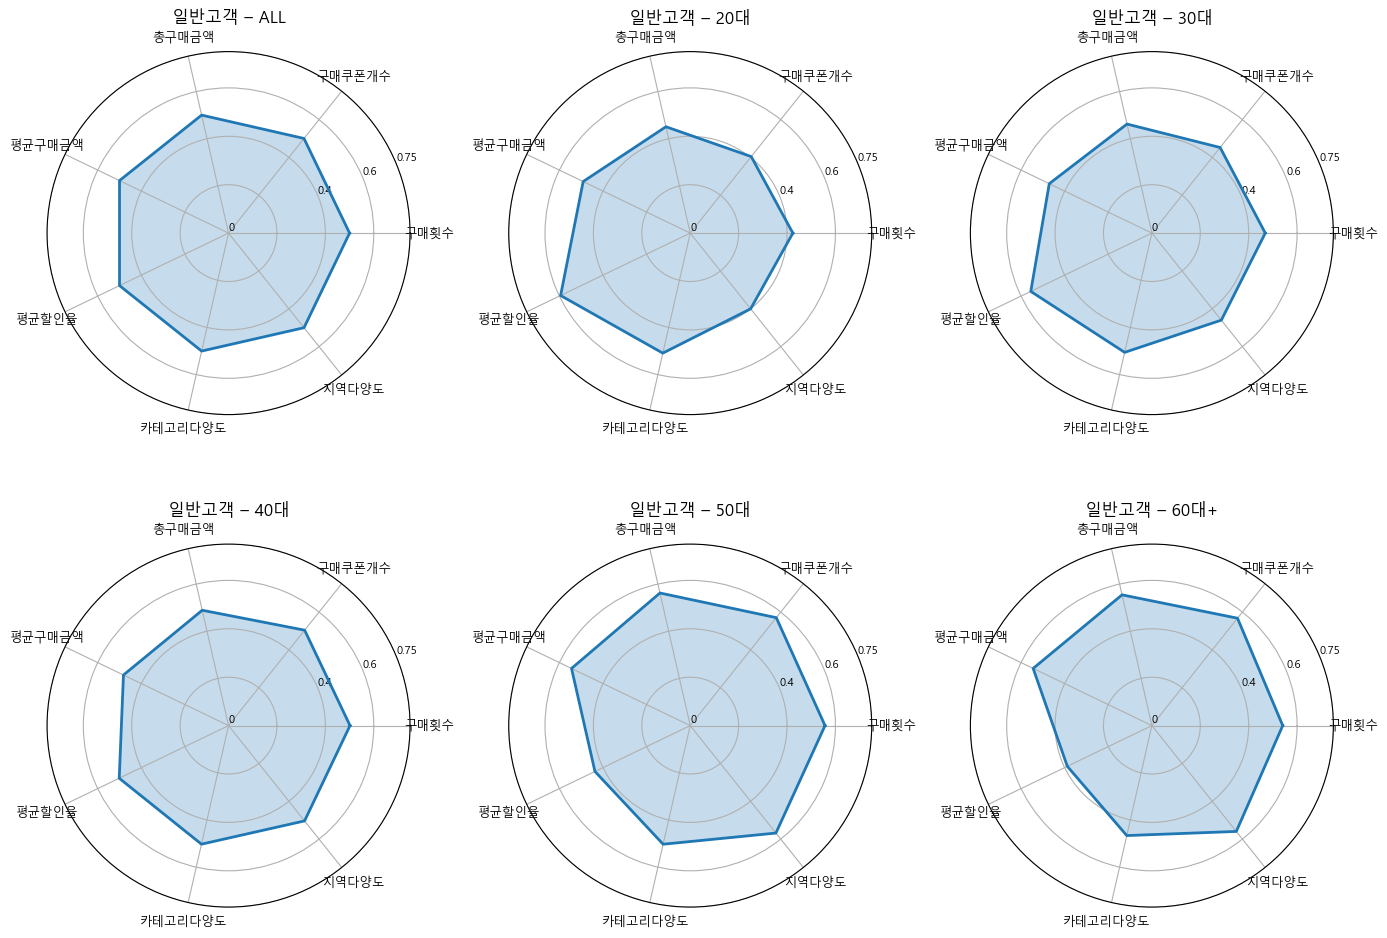

In [297]:
cols_medium = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
] 

medium_rader = medium_df.copy()
medium_rader["AGE_GROUP2"] = medium_rader["AGE_GROUP"].apply(age_group_func)
groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_medium:
    medium_rader[col + "_pct"] = medium_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_medium]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


def plot_radar_fixed_range(ax, values, labels, title):
    N = len(labels)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # 마지막 점을 첫 점으로 반복해서 폴리곤 닫기
    values = np.concatenate((values, [values[0]]))

    # 그리기
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    # 라벨
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=12)

    # 범위 고정
    ax.set_ylim(0, 0.75)                       # 최소 0, 최대 1로 고정
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.75]) # 동일 tick
    ax.set_yticklabels(["0", "", "0.4", "0.6", "0.75"], fontsize=8)

for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = medium_rader[cols_pct].mean().values
    else:
        radar_values = medium_rader[medium_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_medium, f"일반고객 – {group}")

plt.tight_layout()
plt.show()

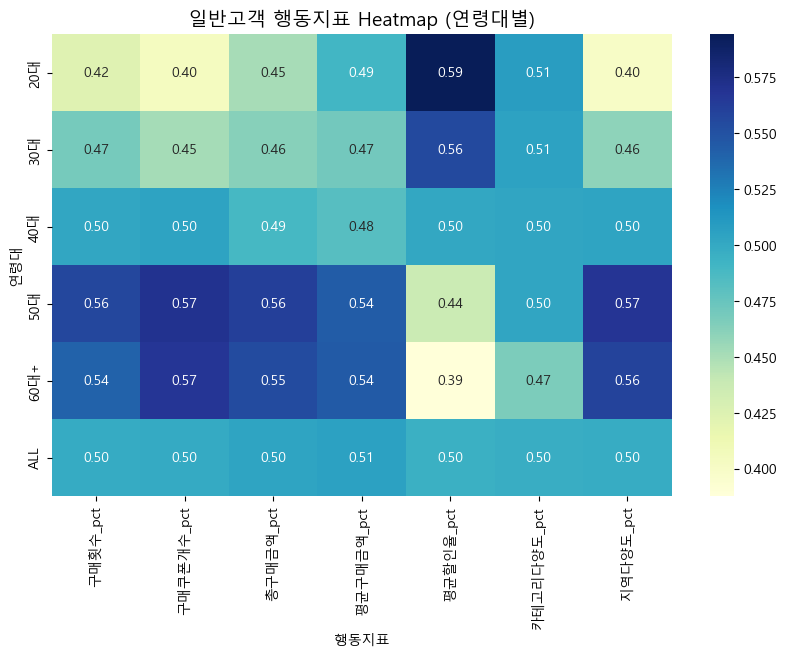

In [306]:
pivot = medium_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("일반고객 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 비활성고객 세그먼트 특징

In [320]:
low_df = rfm_df[rfm_df['고객등급']=='저활성고객'][['Recency', 'Frequency', 'Monetary', '고객등급']].copy()

In [321]:
low_df = low_df.reset_index()

### Merging(df_detail, df_list): 구매기록

In [322]:
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [323]:
low_purchase = low_df.merge(df_detail[['ITEM_COUNT', 'I_DATE', 'USER_ID_hash', 'COUPON_ID_hash', 'PURCHASEID_hash']], 
                      on='USER_ID_hash', how='left')
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [324]:
low_purchase = low_purchase.merge(df_list[['GENRE_NAME', 'PRICE_RATE', 'PURCHASE_PRICE', 'VALIDPERIOD', 'small_area_name', 'COUPON_ID_hash']],
                                 on='COUPON_ID_hash', how='left')
low_purchase.shape[0], len(low_purchase['PURCHASEID_hash'].unique())

(32577, 32577)

In [325]:
low_purchase['GENRE_NAME'] = low_purchase['GENRE_NAME'].map(genre_en)
low_purchase['GENRE_NAME'].unique()

array(['Food', 'Gift card', 'Lesson', 'Other coupon',
       'Hotel and Japanese hotel', 'Leisure', 'Delivery service',
       'Hair salon', 'Nail and eye salon', 'Relaxation', 'Spa', 'Beauty',
       'Health and medical'], dtype=object)

In [326]:
low_purchase['small_area_name'] = low_purchase['small_area_name'].map(small_area_en)
low_purchase['small_area_name'].unique()

array(['Minami area', 'Hokkaido',
       'Shinjuku / Takadanobaba / Nakano / Kichijoji', 'Aichi',
       'Ginza / Shimbashi / Tokyo / Ueno', 'Fukuoka', 'Shizuoka',
       'Yokohama', 'Akasaka / Roppongi / Azabu',
       'Ebisu / Meguro / Shinagawa', 'Nara', 'Kita', 'Hyogo', 'Oita',
       'Kumamoto', 'Kawasaki / Shonan / Hakone', 'Niigata', 'Chiba',
       'Miyagi', 'Saitama', 'Hiroshima', 'Kagawa', 'Ishikawa', 'Nagasaki',
       'Ikebukuro / Kagurazaka / Akabane', 'Fukui',
       'Shibuya / Aoyama / Jiyugaoka', 'Okinawa',
       'Tachikawa / Machida / Hachioji', 'Okayama', 'Shiga', 'Yamaguchi',
       'Kyoto', 'Mie', 'Shimane', 'Yamanashi', 'Gifu', 'Aomori', 'Gunma',
       'Yamagata', 'Tochigi', 'Kagoshima', 'Miyazaki', 'Kochi',
       'Tokushima', 'Toyama', 'Wakayama', 'Nagano', 'Fukushima', 'Ehime',
       'Akita', 'Saga', 'Ibaraki', 'Tottori', 'Iwate'], dtype=object)

In [327]:
low_purchase['I_DATE'].dtype

dtype('O')

In [328]:
low_purchase['I_DATE'] = pd.to_datetime(low_purchase['I_DATE'])
low_purchase['I_DATE'].dtype

dtype('<M8[ns]')

### 비활성고객 구매행동지표 계산
* 구매행동지표 (8가지)  
  구매횟수  
  구매쿠폰개수  
  총구매금액  
  평균구매금액  
  평균할인율  
  카테고리다양도  
  지역다양도  
  재구매주기

In [330]:
low_metrics = get_purchase_metrics(low_purchase)
low_metrics.sample(3).T

,9602,9729,8836
USER_ID_hash,b9a10190ed5baf26afc0bc138e1b56dd,bc27144e2cd336bc3900b562474d04e2,aacb8b99213cced2ea6af6c400d484a5
구매횟수,1,3,2
구매쿠폰개수,2,3,2
총구매금액,500,6925,8900
평균구매금액,500.0,2308.333333,4450.0
평균할인율,50.0,82.666667,71.5
카테고리다양도,1,3,2
지역다양도,1,1,2
재구매주기,NaN,29.5,136.0


In [331]:
low_metrics[low_metrics['구매횟수']==0].count()

USER_ID_hash    0
구매횟수            0
구매쿠폰개수          0
총구매금액           0
평균구매금액          0
평균할인율           0
카테고리다양도         0
지역다양도           0
재구매주기           0
dtype: int64

### Merging(df_user): 인구통계 + 구매행동지표(low_metrics)

In [332]:
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [333]:
low_df = low_df.merge(df_user[['SEX_ID', 'AGE', 'USER_ID_hash']], 
                     on='USER_ID_hash', how='left')
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [334]:
low_df.sample(3)

,USER_ID_hash,Recency,Frequency,Monetary,고객등급,SEX_ID,AGE
7511,90ee0b7a16720fc3305c62a214a9f33b,42,5,26275,저활성고객,m,26
537,0acdd176a7f9c8552031bdb5160e665d,70,3,2660,저활성고객,f,36
5043,614d9ee33ecfa9c5970e3a22ce046f75,209,2,4600,저활성고객,m,35


In [335]:
low_df = low_df.merge(low_metrics, on='USER_ID_hash', how='left')
low_df.shape[0], len(low_df['USER_ID_hash'].unique())

(13113, 13113)

In [336]:
low_df.sample(3).T

,655,7530,7094
USER_ID_hash,0cab25dd1c91b783c117579ef8b39d71,9128473e494251d9eecbd93e2547b38a,891bb9369179a57833c360a413936326
Recency,277,116,288
Frequency,2,5,2
Monetary,2120,16120,2710
고객등급,저활성고객,저활성고객,저활성고객
SEX_ID,m,f,m
AGE,42,26,38
구매횟수,2,5,2
구매쿠폰개수,2,7,2
총구매금액,2120,16120,2710


In [337]:
low_df['AGE_GROUP'] = (low_df['AGE']//10)*10
low_df.sample(3).T

,3983,9688,7925
USER_ID_hash,4d74cc532d820fba3cd80d3929c0755d,bb7ed2c20d8a797d49b0de7eada3c36f,98e174e897901da6a15ee80f2ddf4c24
Recency,77,216,28
Frequency,1,4,1
Monetary,13020,7105,987
고객등급,저활성고객,저활성고객,저활성고객
SEX_ID,f,m,m
AGE,58,79,77
구매횟수,1,4,1
구매쿠폰개수,1,4,1
총구매금액,13020,7105,987


In [338]:
low_df["AGE_GROUP"].value_counts()

AGE_GROUP
30    4281
40    3488
20    2133
50    2052
60     899
70     193
10      57
80      10
Name: count, dtype: int64

In [339]:
low_df.groupby('AGE_GROUP')[[
    '구매횟수','구매쿠폰개수','총구매금액','평균구매금액','평균할인율','카테고리다양도','재구매주기'
]].mean().round(2)

,구매횟수,구매쿠폰개수,총구매금액,평균구매금액,평균할인율,카테고리다양도,재구매주기
AGE_GROUP,,,,,,,
10,2.33,2.77,3867.07,1824.74,60.51,1.68,32.83
20,2.39,3.09,10220.84,5099.02,63.64,1.78,41.80
30,2.43,3.14,9490.17,4518.61,62.94,1.76,41.49
40,2.48,3.42,9321.56,4317.30,62.07,1.73,40.31
50,2.65,3.79,10496.73,4395.84,62.42,1.77,39.95
60,2.66,3.96,10066.64,4142.95,60.35,1.74,39.26
70,2.21,3.05,6881.02,3260.86,60.59,1.60,40.05
80,1.60,2.20,1748.20,1131.27,56.22,1.30,22.75


### 비활성고객 분석 시각화
1. Rader Chart
2. Heat Map

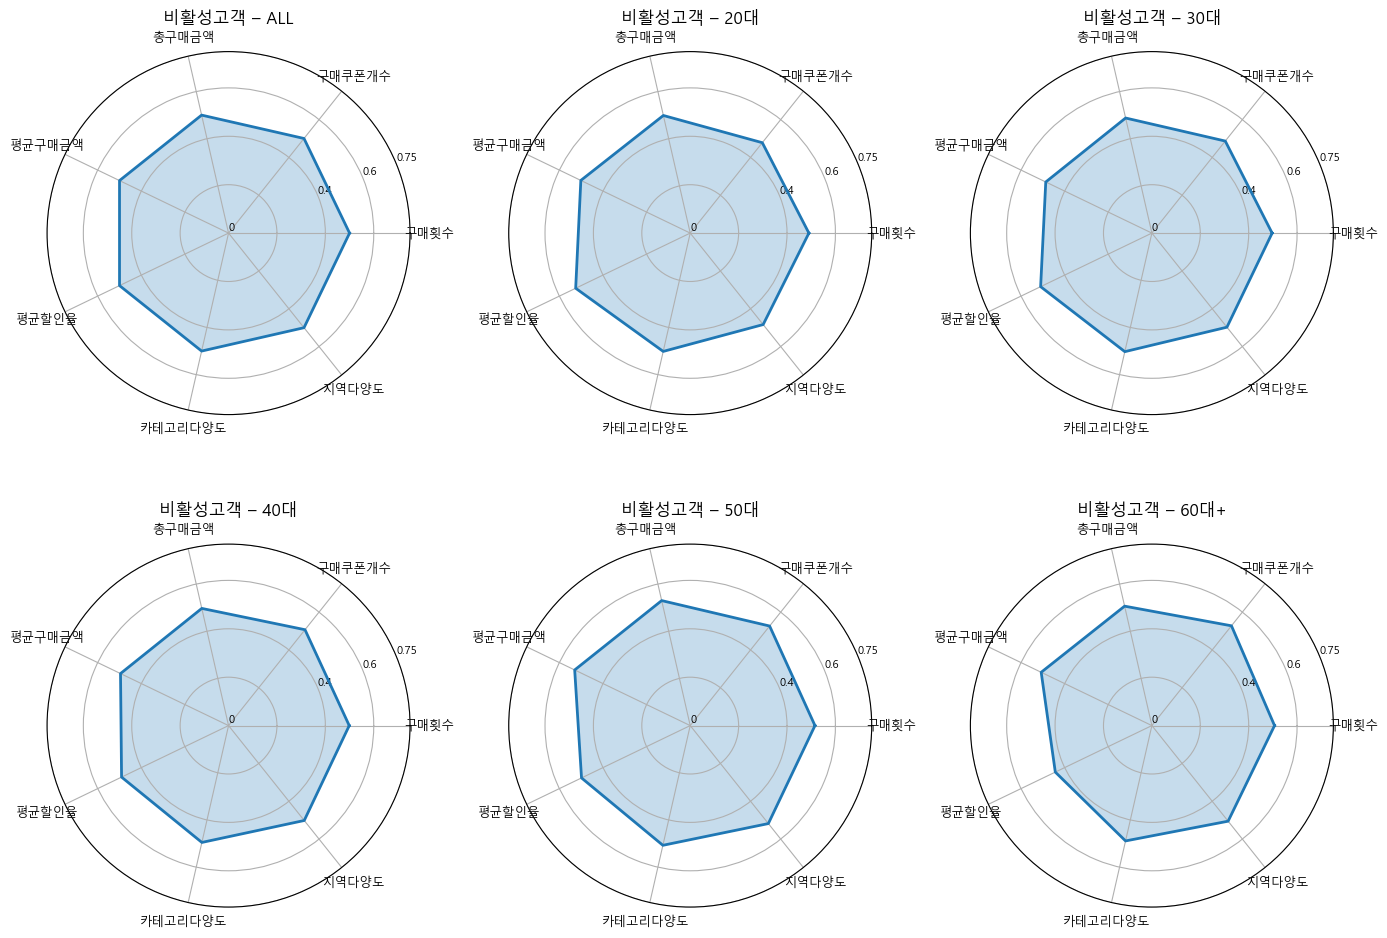

In [343]:
cols_low = [
    "구매횟수",
    "구매쿠폰개수",
    "총구매금액",
    "평균구매금액",
    "평균할인율",
    "카테고리다양도",
    "지역다양도"
] 

low_rader = low_df.copy()
low_rader["AGE_GROUP2"] = low_rader["AGE_GROUP"].apply(age_group_func)
groups = ["ALL", "20대", "30대", "40대", "50대", "60대+"]


# 다른 지표간 비교를 위해 Percentile Scaling 적용
for col in cols_low:
    low_rader[col + "_pct"] = low_rader[col].rank(pct=True)

# 새 Scaling 컬럼
cols_pct = [c + "_pct" for c in cols_low]

fig, axes = plt.subplots(2, 3, figsize=(14, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()


for idx, group in enumerate(groups):
    ax = axes[idx]

    if group == "ALL":
        radar_values = low_rader[cols_pct].mean().values
    else:
        radar_values = low_rader[low_rader["AGE_GROUP2"] == group][cols_pct].mean().values

    plot_radar_fixed_range(ax, radar_values, cols_low, f"비활성고객 – {group}")

plt.tight_layout()
plt.show()

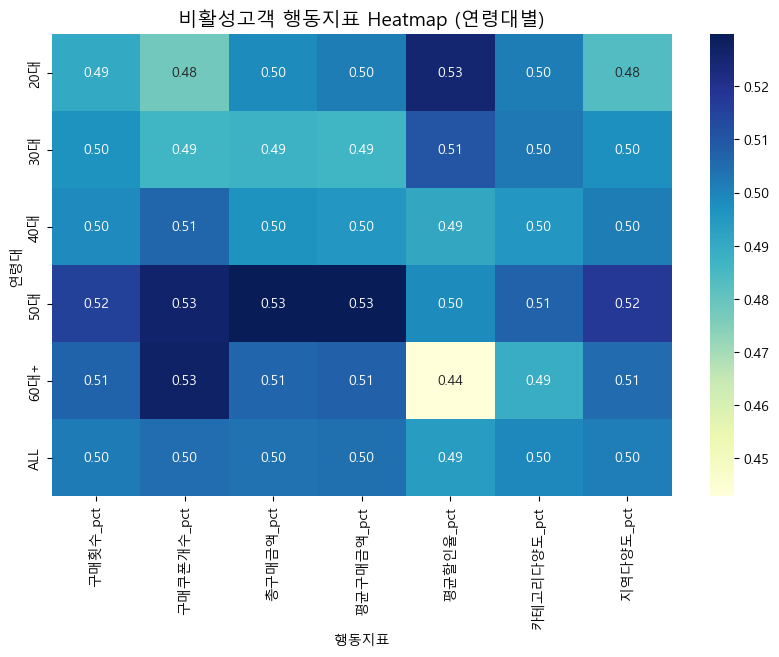

In [341]:
pivot = low_rader.groupby("AGE_GROUP2")[cols_pct].mean()
pivot.loc["ALL"] = pivot[cols_pct].mean()

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("비활성고객 행동지표 Heatmap (연령대별)", fontsize=14)
plt.ylabel("연령대")
plt.xlabel("행동지표")
plt.show()

## 세그먼트별 전체 비교

In [344]:
vip_rader["고객등급"] = "VIP"
medium_rader["고객등급"] = "일반고객"
low_rader["고객등급"] = "저활성고객"

all_rader=  pd.concat([vip_rader, medium_rader, low_rader], axis=0, ignore_index=True)

In [345]:
all_rader.sample(3).T

,21988,20339,3812
USER_ID_hash,f02faa9addb21357fae360b04fda7648,cf9805eb78cceba252d93f6050ed55e1,61881a4f620fd340301fc7f119cb695f
Recency,181,150,40
Frequency,1,6,6
Monetary,2000,42420,26325
고객등급,저활성고객,저활성고객,일반고객
SEX_ID,m,f,m
AGE,32,62,43
구매횟수,1,6,6
구매쿠폰개수,1,7,12
총구매금액,2000,42420,26325


In [347]:
cols_pct = [c+"_pct" for c in cols_low]
all_rader.drop(columns=cols_pct, axis=1, errors='ignore', inplace=True)
all_rader.sample(3).T

,4181,5038,14843
USER_ID_hash,6ba1d578ed9073f6f76dacc3e26da029,8246bfe168db1536f90946f778384b5e,63e07be1b877b3fe4861a535aaf8ee2c
Recency,5,20,237
Frequency,39,4,2
Monetary,179783,1972,10050
고객등급,일반고객,일반고객,저활성고객
SEX_ID,f,m,f
AGE,54,18,43
구매횟수,39,4,2
구매쿠폰개수,41,4,2
총구매금액,179783,1972,10050


In [350]:
for col in cols:
    all_rader[col + "_pct"] = all_rader[col].rank(pct=True)

all_rader.sample(3).T

,20761,22607,11953
USER_ID_hash,d75edf73d15df7cdbd51a8f0c4b234f5,fca6053ca7b5908b1560168ff982159b,2bf8bbb2c200c248fecd5a92047405e6
Recency,156,277,36
Frequency,1,2,3
Monetary,3500,25710,5990
고객등급,저활성고객,저활성고객,저활성고객
SEX_ID,m,f,m
AGE,35,26,59
구매횟수,1,2,3
구매쿠폰개수,5,3,4
총구매금액,3500,25710,5990


In [351]:
all_pivot = all_rader.groupby("고객등급")[cols_pct].mean()
all_pivot

,구매횟수_pct,구매쿠폰개수_pct,총구매금액_pct,평균구매금액_pct,평균할인율_pct,카테고리다양도_pct,지역다양도_pct
고객등급,,,,,,,
VIP,0.988397,0.982751,0.974770,0.680629,0.430933,0.882081,0.953518
일반고객,0.724726,0.717615,0.685770,0.563216,0.542354,0.693708,0.708430
저활성고객,0.327256,0.332460,0.355301,0.450274,0.471799,0.352149,0.339771


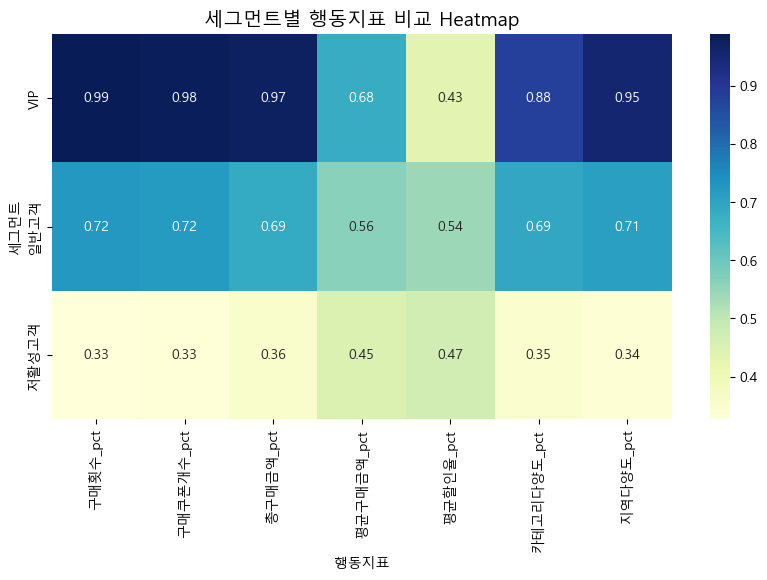

In [353]:
plt.figure(figsize=(10,5))
sns.heatmap(all_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("세그먼트별 행동지표 비교 Heatmap", fontsize=14)
plt.xlabel("행동지표")
plt.ylabel("세그먼트")
plt.show()

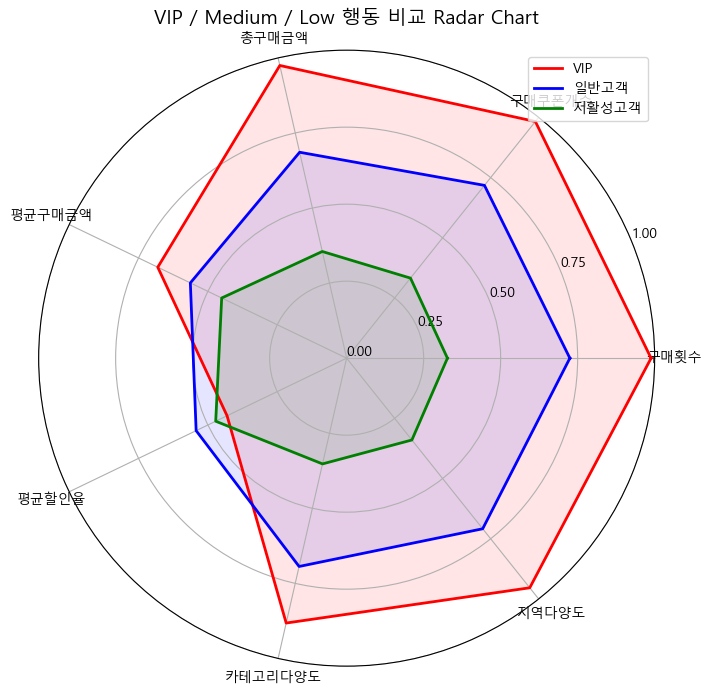

In [356]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# 값
angles = np.linspace(0, 2*np.pi, len(cols), endpoint=False).tolist()
angles += angles[:1]

# 범위 고정
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

for seg, color in zip(["VIP", "일반고객", "저활성고객"], ["red", "blue", "green"]):
    values = all_pivot.loc[seg].values
    values = np.concatenate((values, [values[0]]))

    ax.plot(angles, values, linewidth=2, label=seg, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cols, fontsize=10)
plt.legend(loc="upper right")
plt.title("VIP / Medium / Low 행동 비교 Radar Chart", fontsize=14)
plt.show()
